# Tri-AD Data Science Challenge

## Goal
You will be provided with a data set about students. The data set includes
information about the students’ age, nationality, gender, as well as information
about their studying habits. There is also a binary column expressing whether or not
the students passed an important test.

## Part 1: Analysis
- Describe the demographic details of people most likely to pass the test
- Describe the efficacy of the two interventions - the test prep course and the
Dojo class
- Identify any other interesting trends from the data set and offer some analysis
as to their importance or cause.

## Part 2: Model Creation
Create a model that can predict whether or not a student will pass the test. Use the
provided data set to train your model and test its accuracy. You have free choice of
programming language, algorithm, and tools.


### Table of contents:


- <a href='#2'>Loading and cleaning the data</a>
</br></br>
- <a href='#3'>Part 1: Exploratory Data Analysis (EDA)</a> 
	- <a href='#3.1'>Task 1: Describe the demographic details of people most likely to pass the test</a>
	- <a href='#3.2'>Task 2: Describe the efficacy of the two interventions - the test prep course and the Dojo class</a>
	- <a href='#3.1'>Task 3: Identify any other interesting trends from the data set and offer some analysis to their importance</a>
</br></br>
- <a href='#4'>Part 2: Model Creation</a> 
	- <a href='#4.1'>Functions for evaluation</a>
	- <a href='#4.2'>Defining features X and target y and train-test-split</a>
	- <a href='#4.4'>Logistic regression as first model</a>
	- <a href='#4.5'>KNN</a>
	- <a href='#4.6'>Multilayer perceptron</a>
	- <a href='#4.7'>XGBoost</a>
	- <a href='#4.8'>SVM</a>	
	- <a href='#4.9'>Lightgbm</a>
	- <a href='#4.10'>Decision tree</a>
    - <a href='#4.11'>Random forest</a>
	- <a href='#4.12'>Neural networks</a>
	- <a href='#4.13'>Conclusion</a>
</br></br>






## <a id='1'>Importing libraries</a> 

In [111]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn import set_config
set_config(transform_output="pandas")

import missingno as msno 

# Set random seed 
RSEED = 42

In [4]:
pd.set_option('display.max_columns', None)

## <a id='2'>Loading and cleaning the data</a>

In [44]:
# Read database string from .env file 
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [45]:
# import the data into a pandas dataframe
query_string_1 = "SELECT * FROM takemehome.triad"
df = pd.read_sql(query_string_1, db)

#export the data to a csv-file
df.to_csv('TriAD.csv',index=False)

In [5]:
df = pd.read_csv('TriAD.csv')

In [114]:
df

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,10.578594,True,False,True,None
1,Male,Japanese,Japan,22,7.814520,False,False,True,None
2,Male,Japanese,Japan,27,4.213682,False,False,True,None
3,Male,Japanese,Japan,24,NaN,False,False,True,None
4,Female,Japanese,Japan,21,3.248907,False,False,False,None
...,...,...,...,...,...,...,...,...,...
4995,Male,Japanese,Japan,29,3.291721,False,False,True,None
4996,Female,Japanese,Japan,22,1.590491,False,False,False,None
4997,Male,English,UK,25,5.029988,False,False,False,None
4998,Male,Japanese,Japan,22,1.730570,True,False,True,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            5000 non-null   object 
 1   lang           5000 non-null   object 
 2   country        5000 non-null   object 
 3   age            5000 non-null   int64  
 4   hours_studied  3018 non-null   float64
 5   dojo_class     5000 non-null   bool   
 6   test_prep      5000 non-null   bool   
 7   pass           5000 non-null   bool   
 8   notes          772 non-null    object 
dtypes: bool(3), float64(1), int64(1), object(4)
memory usage: 249.2+ KB


In [17]:
df.describe()

,age,hours_studied
count,5000.000000,3018.000000
mean,25.873400,4.964076
std,7.349978,3.203037
min,18.000000,0.139203
25%,20.000000,2.555823
50%,24.000000,4.247235
75%,30.000000,6.660737
max,50.000000,24.259314


### Checking for duplicated rows:

In [6]:
df.duplicated().value_counts()

False    3887
True     1113
Name: count, dtype: int64

### A lot of duplicated rows, deleting them:

In [7]:
# remove duplicates
df = df.drop_duplicates()
# reset index inplace
df.reset_index(inplace=True, drop=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            3887 non-null   object 
 1   lang           3887 non-null   object 
 2   country        3887 non-null   object 
 3   age            3887 non-null   int64  
 4   hours_studied  3018 non-null   float64
 5   dojo_class     3887 non-null   bool   
 6   test_prep      3887 non-null   bool   
 7   pass           3887 non-null   bool   
 8   notes          771 non-null    object 
dtypes: bool(3), float64(1), int64(1), object(4)
memory usage: 193.7+ KB


### Is notes column relevant? :

In [8]:
df['notes'].nunique()

393

In [9]:
df['notes'].unique()

array([nan, 'CON', '@{[system "touch /tmp/blns.fail"]}', '`⁄€‹›ﬁﬂ‡°·‚—±',
       '᚛ᚄᚓᚐᚋᚒᚄ\u1680ᚑᚄᚂᚑᚏᚅ᚜', 'Œ„´‰ˇÁ¨ˆØ∏”’', '😍',
       'ABC<div style="x:exp\\x00ression(javascript:alert(1)">DEF',
       '\xad\u0600\u0601\u0602\u0603\u0604\u0605\u061c\u06dd\u070f\u180e\u200b\u200c\u200d\u200e\u200f\u202a\u202b\u202c\u202d\u202e\u2060\u2061\u2062\u2063\u2064\u2066\u2067\u2068\u2069\u206a\u206b\u206c\u206d\u206e\u206f\ufeff\ufff9\ufffa\ufffb\U000110bd\U0001bca0\U0001bca1\U0001bca2\U0001bca3\U0001d173\U0001d174\U0001d175\U0001d176\U0001d177\U0001d178\U0001d179\U0001d17a\U000e0001\U000e0020\U000e0021\U000e0022\U000e0023\U000e0024\U000e0025\U000e0026\U000e0027\U000e0028\U000e0029\U000e002a\U000e002b\U000e002c\U000e002d\U000e002e\U000e002f\U000e0030\U000e0031\U000e0032\U000e0033\U000e0034\U000e0035\U000e0036\U000e0037\U000e0038\U000e0039\U000e003a\U000e003b\U000e003c\U000e003d\U000e003e\U000e003f\U000e0040\U000e0041\U000e0042\U000e0043\U000e0044\U000e0045\U000e0046\U000e0047\U000e0048\U000e0049

### Notes columns seems irrelevant, will be dropped:

In [10]:
del df['notes']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            3887 non-null   object 
 1   lang           3887 non-null   object 
 2   country        3887 non-null   object 
 3   age            3887 non-null   int64  
 4   hours_studied  3018 non-null   float64
 5   dojo_class     3887 non-null   bool   
 6   test_prep      3887 non-null   bool   
 7   pass           3887 non-null   bool   
dtypes: bool(3), float64(1), int64(1), object(3)
memory usage: 163.4+ KB


### Taking care of missing(NaN) values:

In [11]:
df.isnull().sum()

sex                0
lang               0
country            0
age                0
hours_studied    869
dojo_class         0
test_prep          0
pass               0
dtype: int64

Visualizing distribution of missing values:

<Axes: >

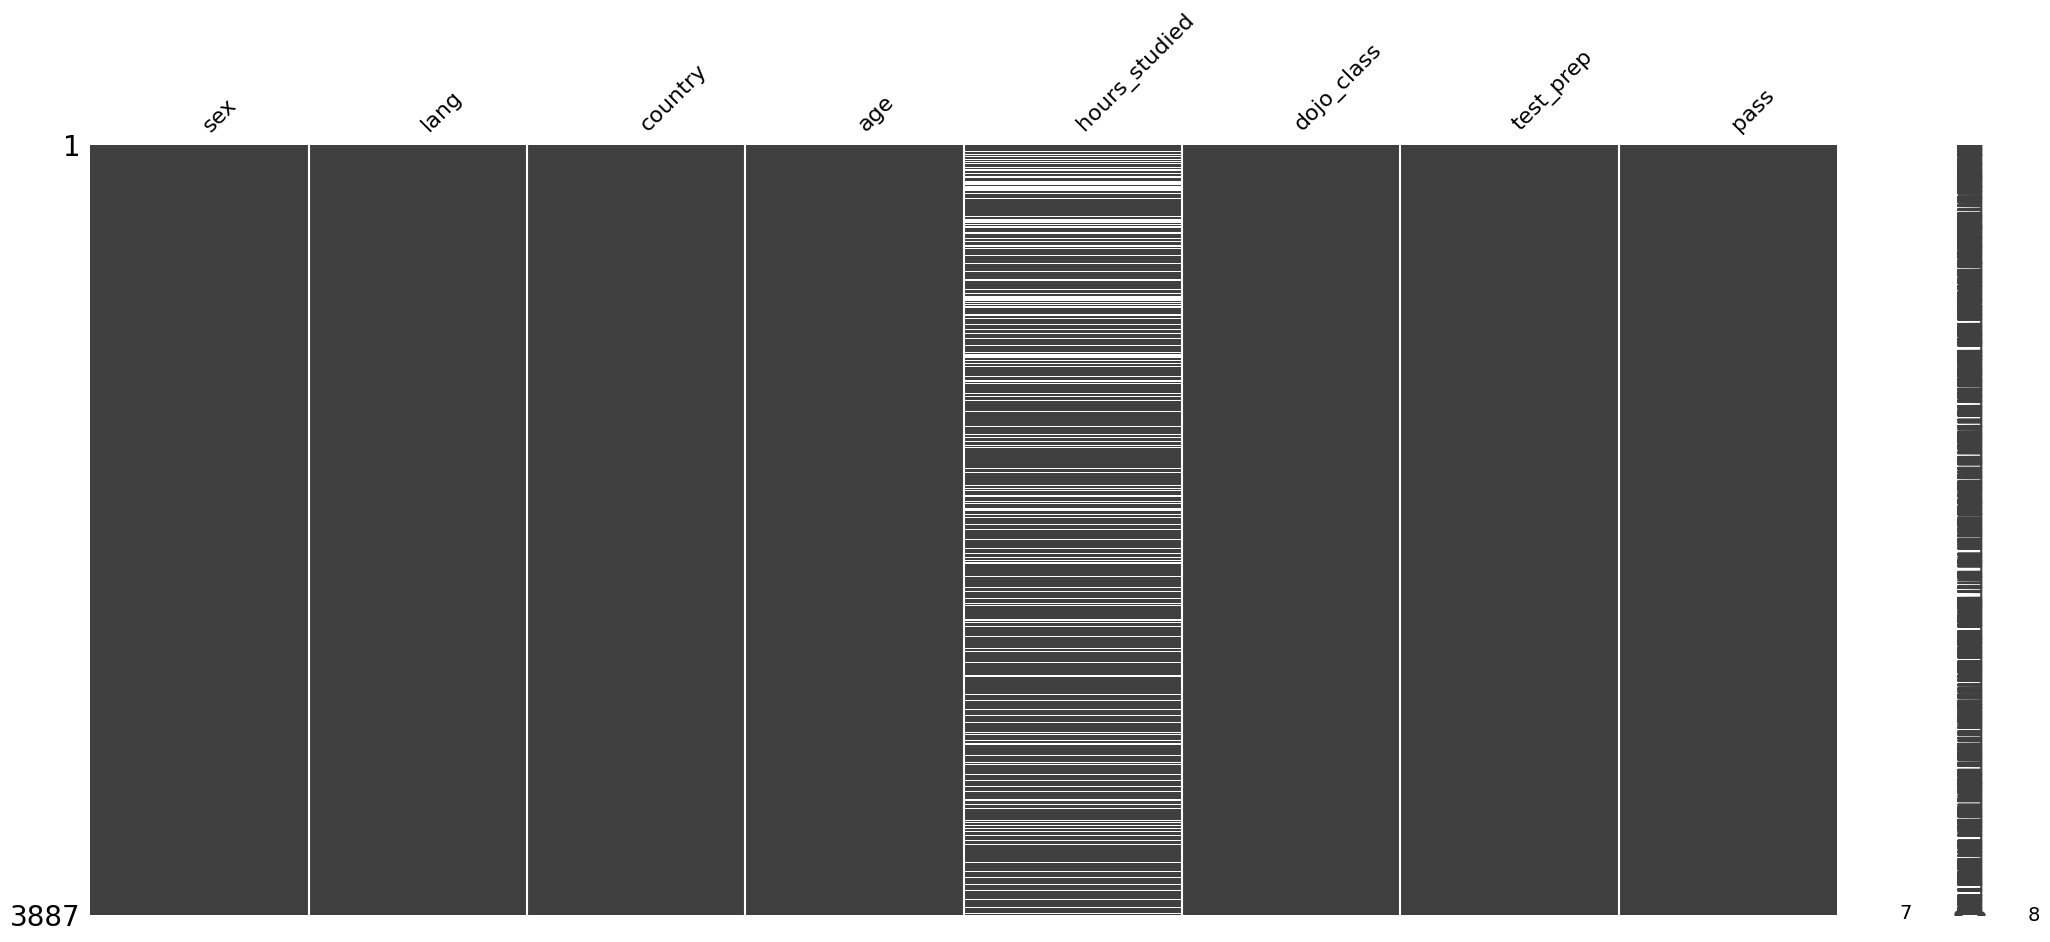

In [12]:
msno.matrix(df)

Pretty equally distributed

Checking distribution of 'hours_studied' column with histogram:

<Axes: xlabel='hours_studied', ylabel='Count'>

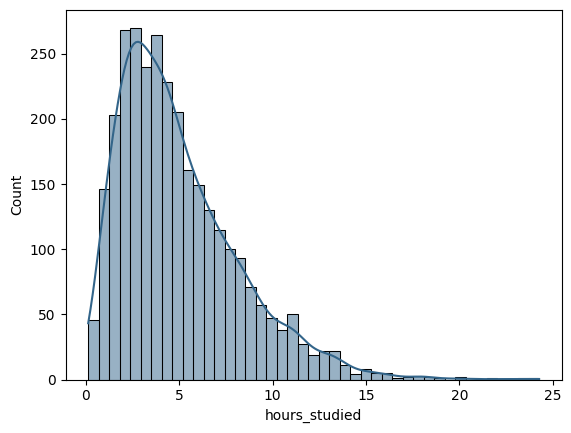

In [13]:
sns.histplot(df['hours_studied'], kde=True, color='#33658A')

'hours_studied' is skewed, therefore the missing values with be filled with the median instead of the mean:

In [14]:
hours_studied_median = df['hours_studied'].median()
df['hours_studied'].fillna(hours_studied_median, inplace=True)

In [119]:
df.isnull().sum()

sex              0
lang             0
country          0
age              0
hours_studied    0
dojo_class       0
test_prep        0
pass             0
dtype: int64

### Encoding categorical features:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            3887 non-null   object 
 1   lang           3887 non-null   object 
 2   country        3887 non-null   object 
 3   age            3887 non-null   int64  
 4   hours_studied  3887 non-null   float64
 5   dojo_class     3887 non-null   bool   
 6   test_prep      3887 non-null   bool   
 7   pass           3887 non-null   bool   
dtypes: bool(3), float64(1), int64(1), object(3)
memory usage: 163.4+ KB


Encoding is done with a a copy of the dataframe df, since categorical features are needed for visualisation.

In [15]:
df_enc = df.copy()

In [16]:
df_enc['sex'] = LabelEncoder().fit_transform(df_enc['sex'])

In [17]:
df_enc['lang'] = LabelEncoder().fit_transform(df_enc['lang'])

In [18]:
df_enc['country'] = LabelEncoder().fit_transform(df_enc['country'])

In [19]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            3887 non-null   int32  
 1   lang           3887 non-null   int32  
 2   country        3887 non-null   int32  
 3   age            3887 non-null   int64  
 4   hours_studied  3887 non-null   float64
 5   dojo_class     3887 non-null   bool   
 6   test_prep      3887 non-null   bool   
 7   pass           3887 non-null   bool   
dtypes: bool(3), float64(1), int32(3), int64(1)
memory usage: 117.8 KB


In [20]:
df_enc

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,1,4,4,20,10.578594,True,False,True
1,1,4,4,22,7.814520,False,False,True
2,1,4,4,27,4.213682,False,False,True
3,1,4,4,24,4.247235,False,False,True
4,0,4,4,21,3.248907,False,False,False
...,...,...,...,...,...,...,...,...
3882,1,4,4,29,3.291721,False,False,True
3883,0,4,4,22,1.590491,False,False,False
3884,1,0,8,25,5.029988,False,False,False
3885,1,4,4,22,1.730570,True,False,True


# <a id='3'>Part 1: Exploratory Data Analysis (EDA)</a>

### <a id='3.1'>Task 1: Describe the demographic details of people most likely to pass the test</a>

### First hypothesis: country background has influence on passing the test

Checking the distribution of countries with a value count with the countries:

In [21]:
df_country_count = df['country'].value_counts().reset_index(name="count")

In [22]:
df_country_count

,country,count
0,Japan,2956
1,USA,136
2,Australia,129
3,Italy,129
4,New Zealand,126
5,France,119
6,UK,117
7,Mexico,72
8,Spain,58
9,Finland,45


Mostly Japan, this data seem to be from a japanese place of business

Making new dataframe with only country and pass columns:

In [23]:
df_country_and_pass = df[['country','pass']]
df_country_and_pass

,country,pass
0,Japan,True
1,Japan,True
2,Japan,True
3,Japan,True
4,Japan,False
...,...,...
3882,Japan,True
3883,Japan,False
3884,UK,False
3885,Japan,True


Groupby country:

In [28]:
df_country_and_pass_grouped = df_country_and_pass.groupby('country')
df_country_and_pass_grouped


Value counts of pass in df_country_and_pass_grouped:

In [29]:
counts = df_country_and_pass_grouped['pass'].value_counts().unstack()
counts 

pass,False,True
country,,
Australia,69,60
Finland,28,17
France,61,58
Italy,74,55
Japan,1561,1395
Mexico,36,36
New Zealand,62,64
Spain,32,26
UK,63,54


Visualisation:

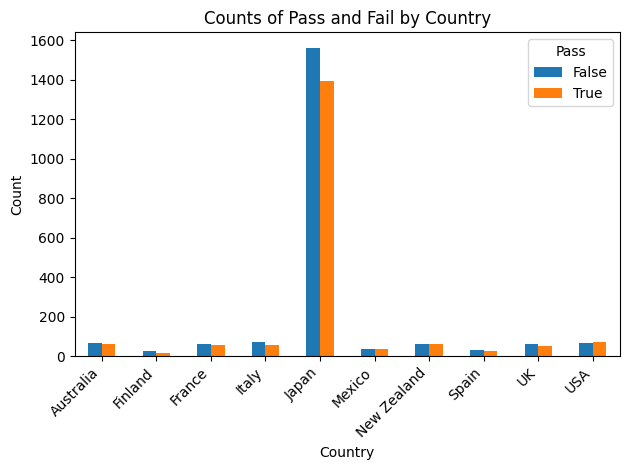

In [30]:

# Count the number of 'True' and 'False' values in the 'pass' column for each 'country'
counts = df_country_and_pass_grouped['pass'].value_counts().unstack()

# Create a bar plot
counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Pass and Fail by Country')

# Show the legend
plt.legend(title='Pass', labels=['False', 'True'], loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Not very informative like this, since most counts are from Japan, makes more sense to look at relative values:

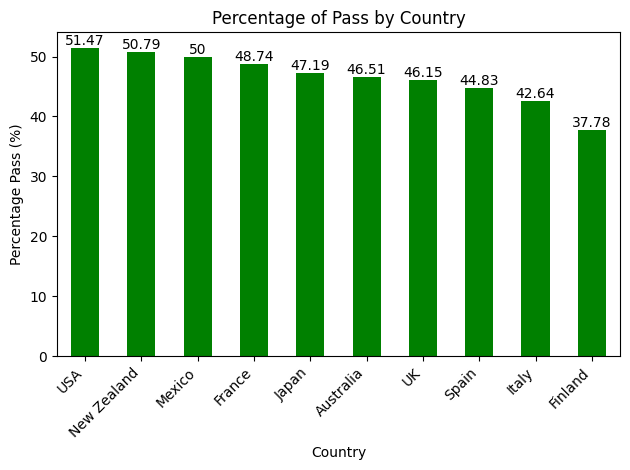

In [31]:

# Count the number of 'True' and 'False' values in the 'pass' column for each 'country'
counts = df_country_and_pass_grouped['pass'].value_counts().unstack()

# Calculate the percentage of 'True' values (Pass) per country
percentage_pass = (counts[True] / (counts[True] + counts[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass = percentage_pass.sort_values(ascending=False)
percentage_pass = percentage_pass.round(2)

# Create a bar plot for the percentage of Pass per country
ax = percentage_pass.plot(kind='bar', color='green')
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Percentage Pass (%)')
plt.title('Percentage of Pass by Country')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


There are indeed some differences depending on the country background, people from the the USA had a significantly higher passing rate of 51.47 % than people from Finland with a passing rate of 37.78%.

### Second hypothesis: age groups have different passing rates

Checking how many ages are present in the data:

In [32]:
df['age'].nunique()

33

In [34]:
df['age'].unique()

array([20, 22, 27, 24, 21, 18, 23, 19, 29, 25, 32, 34, 26, 42, 40, 31, 28,
       35, 48, 36, 37, 30, 47, 38, 44, 43, 33, 39, 49, 41, 46, 45, 50],
      dtype=int64)

Ages vary from 18 to 50

Checking the age distribution:

[Text(0.5, 1.0, 'age distribution'), Text(0.5, 0, 'age')]

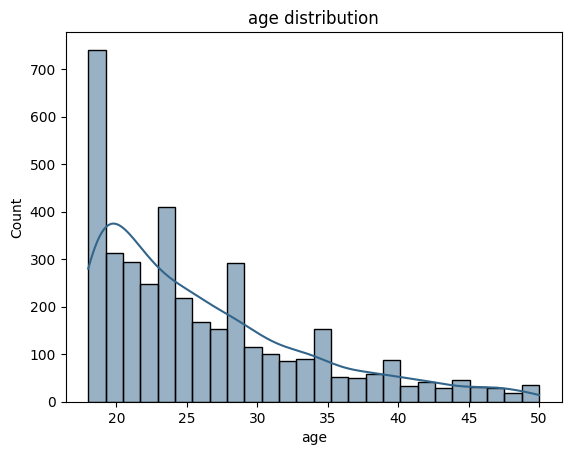

In [33]:
# Histogram
sns.histplot(df['age'], kde=True, color='#33658A').set(title='age distribution', xlabel='age')

In [37]:
df['age'].value_counts()

age
18    380
19    361
20    314
21    294
22    248
23    226
25    218
24    183
26    167
28    157
27    154
29    134
30    115
31    100
33     90
32     86
34     85
35     68
38     58
36     51
37     50
40     49
42     41
39     39
41     33
46     30
47     29
43     29
44     28
49     21
48     18
45     17
50     14
Name: count, dtype: int64

Mostly age values from 18 to 30, value counts are decreasing with increasing age value

Making dataframe with age and pass column:

In [38]:
df_age_and_pass = df[['age','pass']]
df_age_and_pass

,age,pass
0,20,True
1,22,True
2,27,True
3,24,True
4,21,False
...,...,...
3882,29,True
3883,22,False
3884,25,False
3885,22,True


Groupby of age with df_age_and_pass dataframe, followed by a value count of pass entries:

In [39]:
df_age_and_pass_grouped = df_age_and_pass.groupby('age')

new_df = df_age_and_pass_grouped['pass'].value_counts().unstack()
new_df 

pass,False,True
age,,
18,208,172
19,207,154
20,177,137
21,158,136
22,139,109
23,122,104
24,100,83
25,125,93
26,89,78


Visualisation:

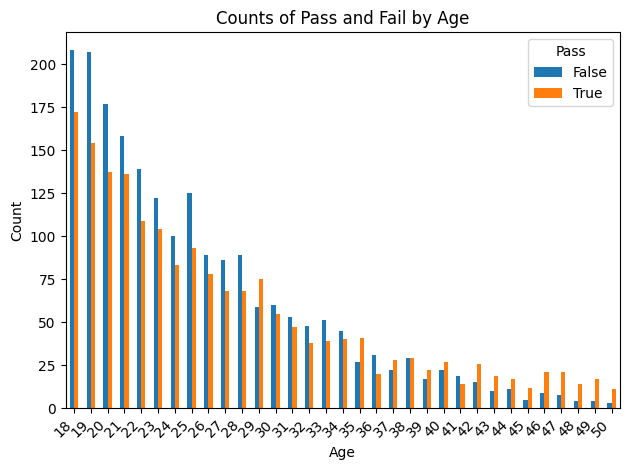

In [40]:

# Create a bar plot
new_df.plot(kind='bar')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Counts of Pass and Fail by Age')

# Show the legend
plt.legend(title='Pass', labels=['False', 'True'], loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  
plt.show()        

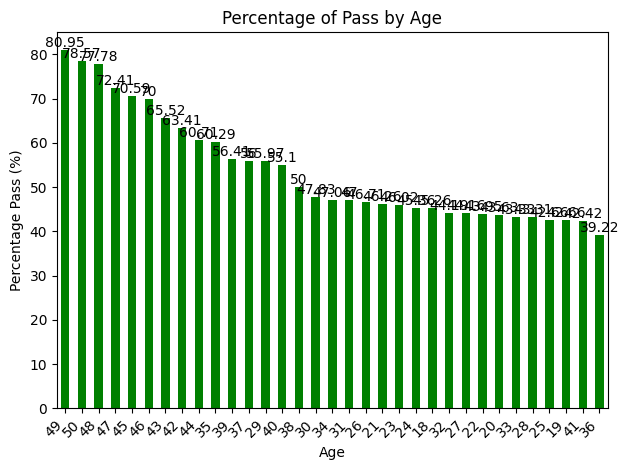

In [41]:
# Calculate the percentage of 'True' values (Pass) per Age
percentage_pass_age = (new_df[True] / (new_df[True] + new_df[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass_age = percentage_pass_age.sort_values(ascending=False)
percentage_pass_age = percentage_pass_age.round(2)

# Create a bar plot for the percentage of Pass per Age
ax = percentage_pass_age.plot(kind='bar', color='green')
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Percentage Pass (%)')
plt.title('Percentage of Pass by Age')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Making the figure broader:

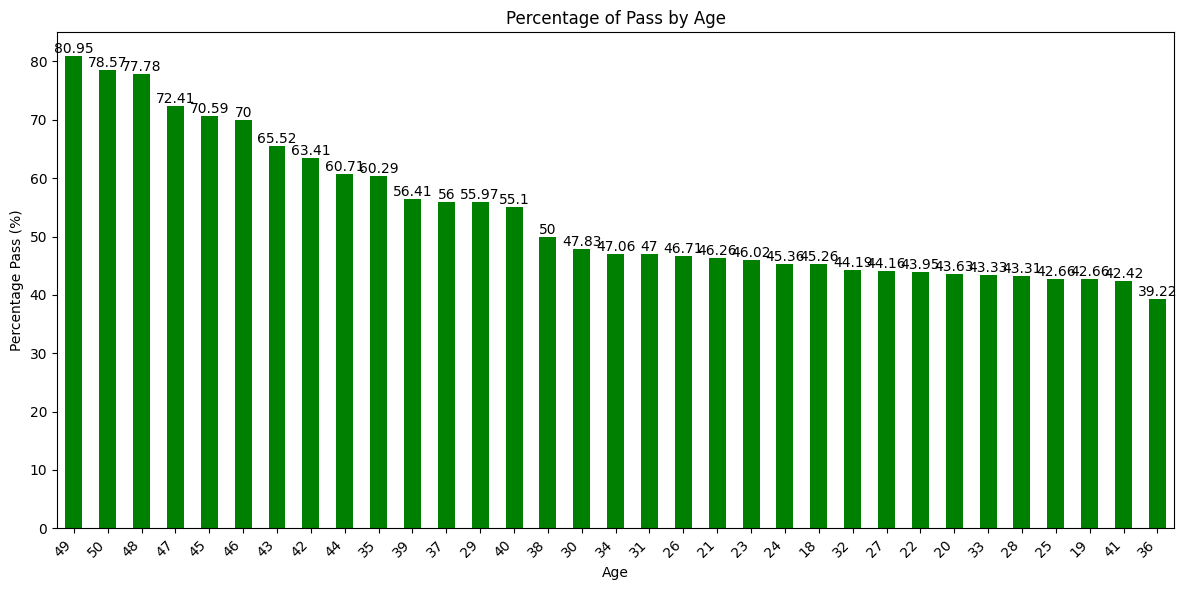

In [42]:
# Create a figure with a broader width
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the percentage of 'True' values (Pass) per Age
percentage_pass_age = (new_df[True] / (new_df[True] + new_df[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass_age = percentage_pass_age.sort_values(ascending=False)
percentage_pass_age = percentage_pass_age.round(2)

# Create a bar plot for the percentage of Pass per Age
ax = percentage_pass_age.plot(kind='bar', color='green')
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Percentage Pass (%)')
plt.title('Percentage of Pass by Age')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()  


Drastic differences of passing percentage for different ages. It is important to note that there are significant differences in the value counts and age values higher than 40 have a value count lower than 50 with the highest age value of 50 only having a value count of 14.

In this data people with an age value of 45 to 50 had remarkably high passing percentages of 70 to 80%, in stark contrast to the age group 18 to 25 with passing percentages of 42 to 46%.

In the following plot these two age groups are highlighted in different colors, which makes this easier to see.

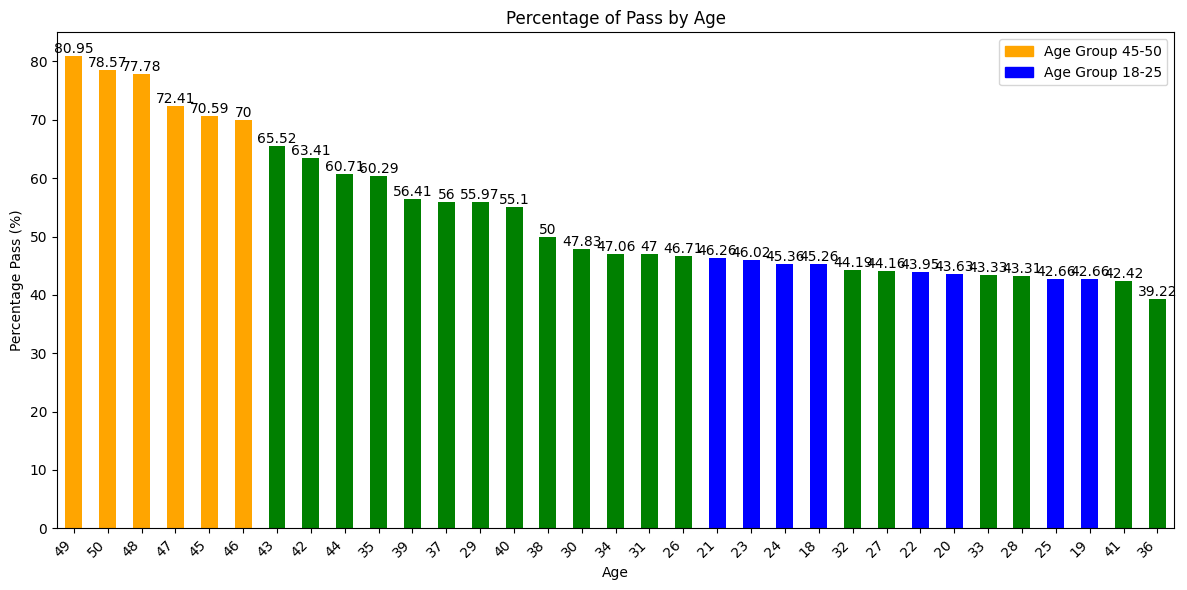

In [43]:
import matplotlib.pyplot as plt

# Assuming your data preparation and calculation is already done

# Create a figure with a broader width
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the percentage of 'True' values (Pass) per Age
percentage_pass_age = (new_df[True] / (new_df[True] + new_df[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass_age = percentage_pass_age.sort_values(ascending=False)
percentage_pass_age = percentage_pass_age.round(2)

# Define the highlighted age groups
highlighted_ages = {'Age Group 45-50': (45, 50), 'Age Group 18-25': (18, 25)}

# Create a bar plot for the percentage of Pass per Age
colors = []
for age in percentage_pass_age.index:
    if 45 <= age <= 50:
        colors.append('orange')  # Assigning 'orange' for ages 45-50
    elif 18 <= age <= 25:
        colors.append('blue')  # Assigning 'blue' for ages 18-25
    else:
        colors.append('green')  # Default color for other age groups

ax = percentage_pass_age.plot(kind='bar', color=colors)
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Percentage Pass (%)')
plt.title('Percentage of Pass by Age')

# Create a custom legend for highlighted age groups
legend_labels = [plt.Rectangle((0,0),1,1, color='orange'), plt.Rectangle((0,0),1,1, color='blue')]
legend_names = ['Age Group 45-50', 'Age Group 18-25']
plt.legend(legend_labels, legend_names)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Third hypothesis: Different sex values have different passing rates

Making a dataframe df_sex_and_pass with sex and pass columns:

In [158]:
df_sex_and_pass = df[['sex','pass']]
df_sex_and_pass

,sex,pass
0,Male,True
1,Male,True
2,Male,True
3,Male,True
4,Female,False
...,...,...
3882,Male,True
3883,Female,False
3884,Male,False
3885,Male,True


Groupby of sex in df_sex_and_pass:

In [159]:
df_sex_and_pass_grouped = df_sex_and_pass.groupby('sex')
df_sex_and_pass_grouped

Value count of pass:

In [160]:
new_df_2 = df_sex_and_pass_grouped['pass'].value_counts().unstack()
new_df_2 

pass,False,True
sex,,
Female,744,316
Male,1308,1519


Visualisation:

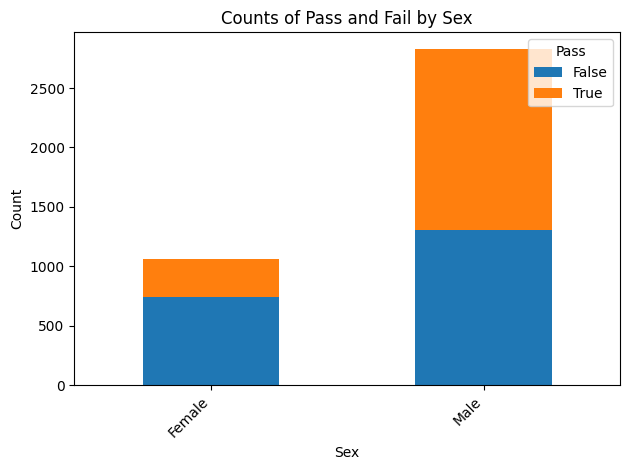

In [161]:
# Create a bar plot
new_df_2.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Pass and Fail by Sex')

# Show the legend
plt.legend(title='Pass', labels=['False', 'True'], loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

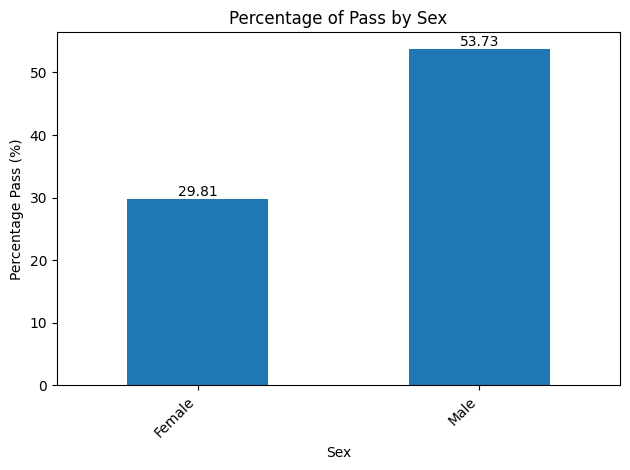

In [162]:
# Calculate the percentage of 'True' values (Pass) per Age
percentage_pass_sex = (new_df_2[True] / (new_df_2[True] + new_df_2[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass_sex = percentage_pass_sex.round(2)

# Create a bar plot for the percentage of Pass per Age
ax = percentage_pass_sex.plot(kind='bar')
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Sex')
plt.ylabel('Percentage Pass (%)')
plt.title('Percentage of Pass by Sex')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

There is a difference for the passing percentage for the two sex values, in the data males have a higher passing percentage of 53.73% than females with a passing percentage of 29.81%.

### <a id='3.2'>Task 2: Describe the efficacy of the two interventions - the test prep course and the Dojo class</a>

Visualising passing rate for all the data by doing a value count of df['pass']:

In [137]:
df_pass_count = df['pass'].value_counts().reset_index(name="count")
df_pass_count 

,pass,count
0,False,2052
1,True,1835


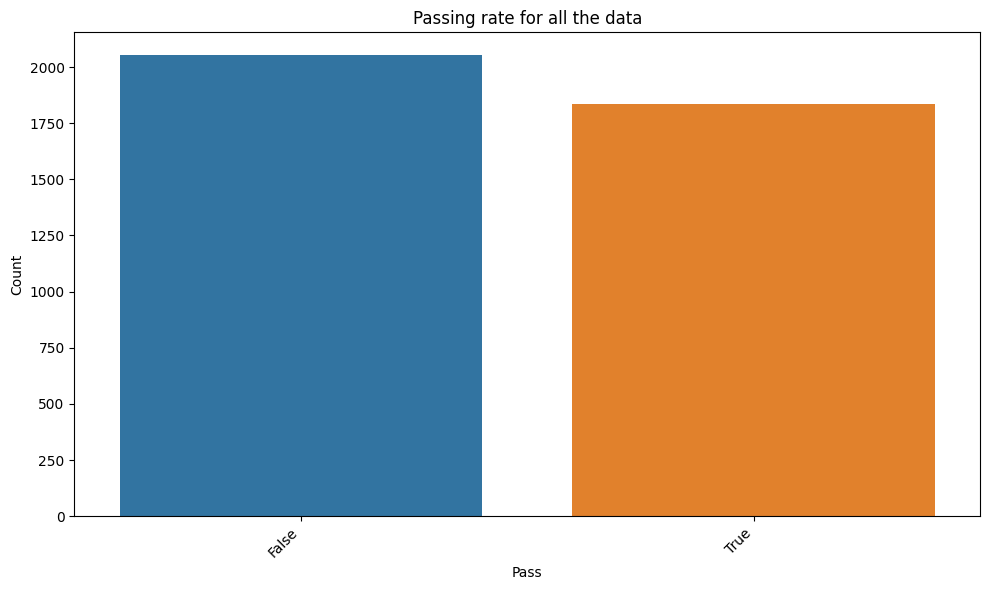

In [197]:
plt.figure(figsize=(10, 6))
palette = ['#1f77b4', '#ff7f0e']  # Define colors for the bars
sns.barplot(data=df_pass_count, x="pass", y="count", palette=palette)
plt.xlabel("Pass")
plt.ylabel("Count")
plt.title("Passing rate for all the data")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualising passing rate for people with no intervention:

Filtering for dojo_class == False and test_prep == False:

In [120]:
df_no_class = df.query("dojo_class == False and test_prep == False")

In [121]:
df_no_class

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
1,Male,Japanese,Japan,22,7.814520,False,False,True
2,Male,Japanese,Japan,27,4.213682,False,False,True
3,Male,Japanese,Japan,24,4.247235,False,False,True
4,Female,Japanese,Japan,21,3.248907,False,False,False
5,Male,Japanese,Japan,18,4.247235,False,False,True
...,...,...,...,...,...,...,...,...
3878,Male,Japanese,Japan,18,3.980590,False,False,True
3880,Male,Japanese,Japan,18,5.223704,False,False,False
3882,Male,Japanese,Japan,29,3.291721,False,False,True
3883,Female,Japanese,Japan,22,1.590491,False,False,False


In [123]:
df_no_class_pass_count = df_no_class['pass'].value_counts().reset_index(name="count")
df_no_class_pass_count

,pass,count
0,False,1362
1,True,742


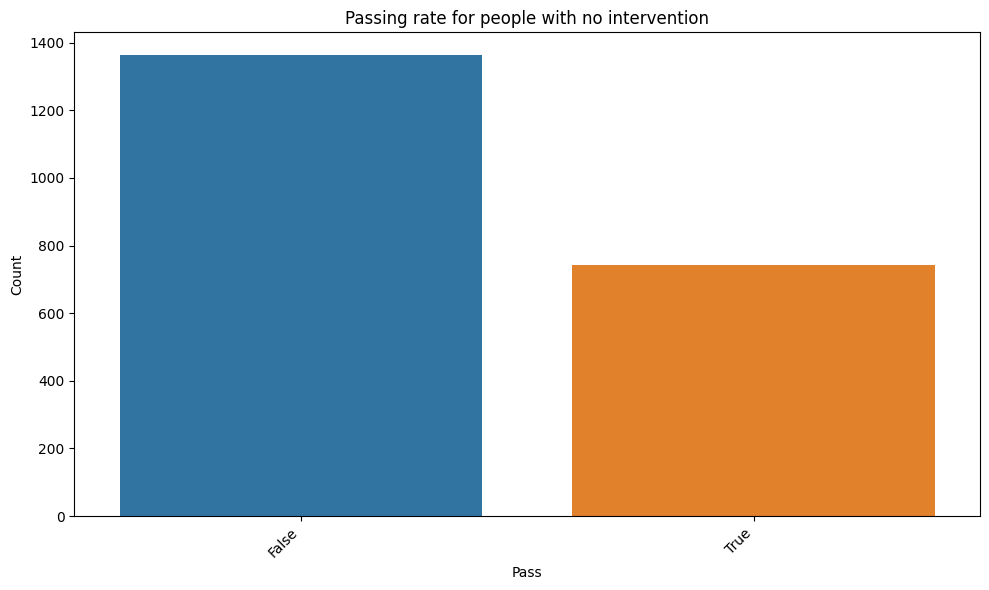

In [199]:
plt.figure(figsize=(10, 6))
palette = ['#1f77b4', '#ff7f0e']  # Define colors for the bars
sns.barplot(data=df_no_class_pass_count, x="pass", y="count" , palette=palette)
plt.xlabel("Pass")
plt.ylabel("Count")
plt.title("Passing rate for people with no intervention")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualising passing rate for people who did the test_prep intervention:

Filtering for test_prep == True:

In [127]:
df_prep = df[df['test_prep'] == True]
df_prep

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
9,Male,Japanese,Japan,18,4.247235,True,True,True
26,Male,Japanese,Japan,19,4.247235,False,True,False
30,Male,Japanese,Japan,21,4.247235,True,True,True
32,Female,Japanese,Japan,18,4.247235,False,True,False
48,Male,Spanish,Spain,24,3.683920,False,True,True
...,...,...,...,...,...,...,...,...
3863,Male,Japanese,Japan,41,2.214792,False,True,False
3868,Female,Japanese,Japan,22,8.569431,False,True,True
3869,Male,Japanese,Japan,20,2.883206,True,True,False
3870,Female,Japanese,Japan,29,4.247235,True,True,True


In [177]:
df_prep_pass_count = df_prep['pass'].value_counts().reset_index(name="count")
df_prep_pass_count

,pass,count
0,True,445
1,False,377


In [181]:
df_prep_pass_count = df_prep_pass_count.sort_values(by='count', ascending=True)
df_prep_pass_count

,pass,count
1,False,377
0,True,445


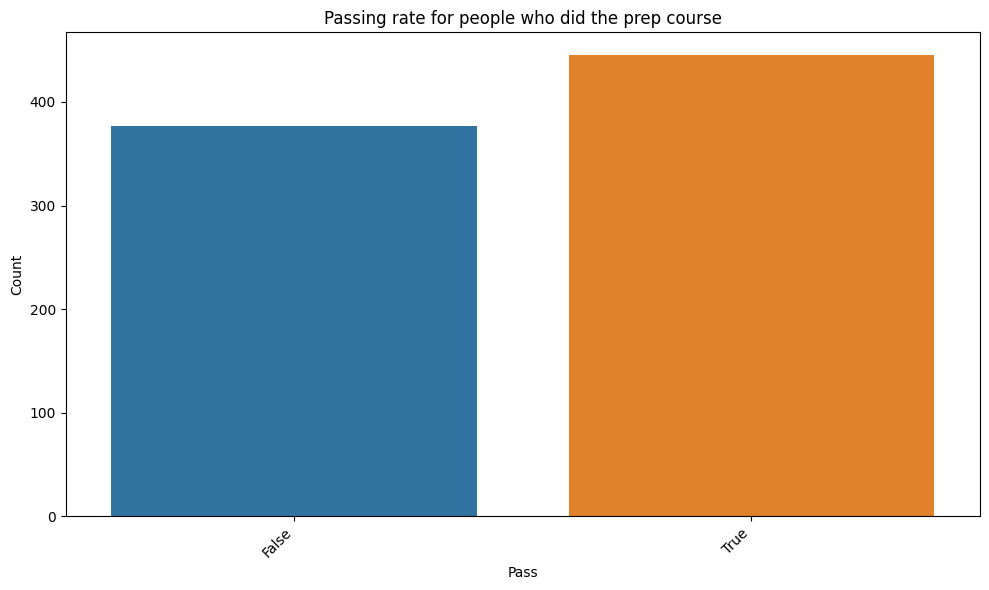

In [201]:
plt.figure(figsize=(10, 6))
palette = ['#1f77b4', '#ff7f0e']  # Define colors for the bars
sns.barplot(data=df_prep_pass_count , x="pass", y="count", palette=palette)
plt.xlabel("Pass")
plt.ylabel("Count")
plt.title("Passing rate for people who did the prep course")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualising passing rate for people who did the dojo_class intervention:

Filtering for dojo_class == True:

In [130]:
df_dojo = df[df['dojo_class'] == True]
df_dojo

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,Male,Japanese,Japan,20,10.578594,True,False,True
9,Male,Japanese,Japan,18,4.247235,True,True,True
10,Male,English,Australia,22,4.247235,True,False,False
16,Male,Japanese,Japan,22,4.247235,True,False,True
18,Male,Japanese,Japan,32,1.536916,True,False,True
...,...,...,...,...,...,...,...,...
3873,Male,Japanese,Japan,35,5.652433,True,False,True
3874,Male,Japanese,Japan,23,1.912158,True,False,False
3879,Male,Japanese,Japan,28,4.247235,True,False,False
3881,Female,English,Australia,25,3.250535,True,False,False


In [131]:
df_dojo_pass_count = df_dojo['pass'].value_counts().reset_index(name="count")
df_dojo_pass_count

,pass,count
0,True,828
1,False,383


In [205]:
df_dojo_pass_count = df_dojo_pass_count.sort_values(by='count', ascending=True)
df_dojo_pass_count

,pass,count
1,False,383
0,True,828


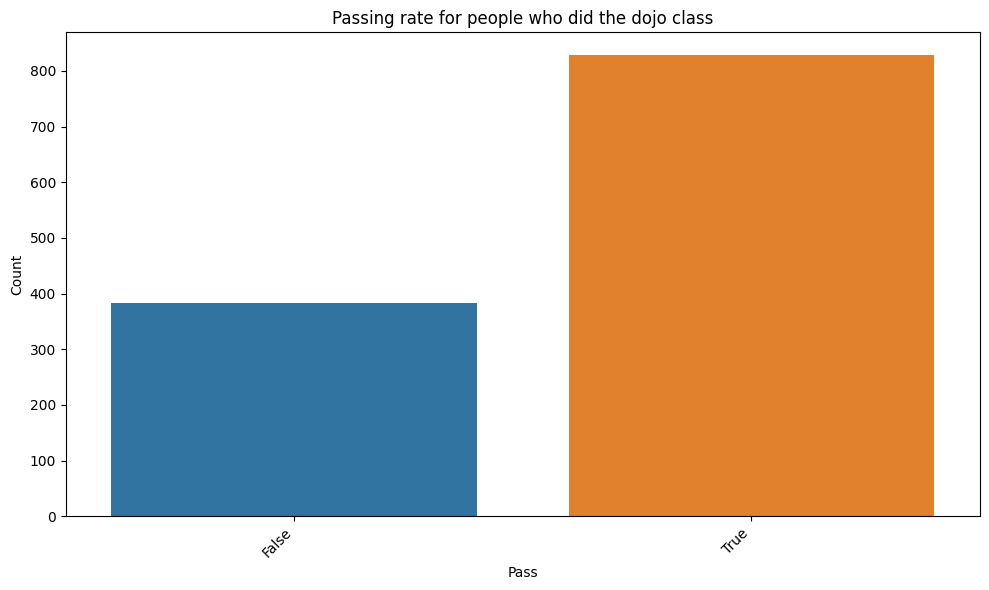

In [206]:
plt.figure(figsize=(10, 6))
palette = ['#1f77b4', '#ff7f0e']  # Define colors for the bars
sns.barplot(data=df_dojo_pass_count, x="pass", y="count", palette=palette)
plt.xlabel("Pass")
plt.ylabel("Count")
plt.title("Passing rate for people who did the dojo class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Combined visulation of the passing rates for people with no intervention and for people who did the prep course and the dojo class:

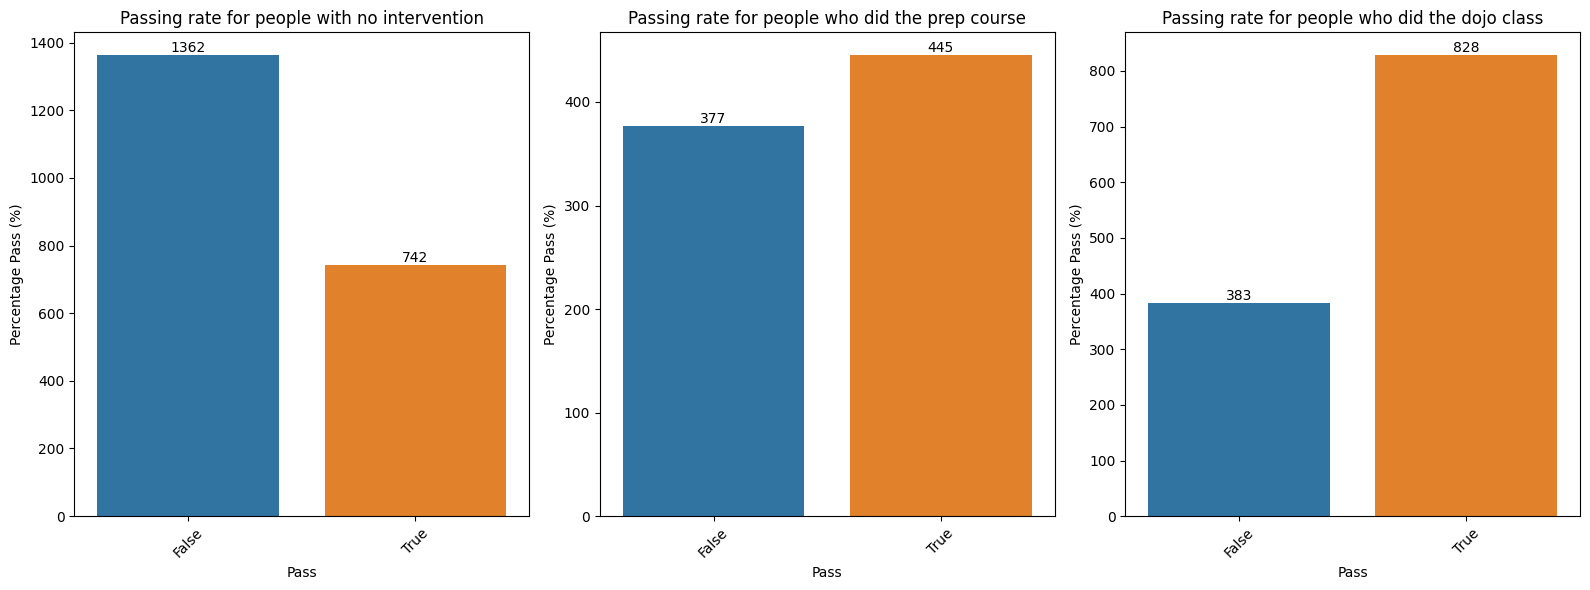

In [210]:

# Create a  grid of subplots
fig, axes = plt.subplots(ncols=3, figsize=(16, 6))

# Bar plot for passing rate for all data
ax = sns.barplot(data=df_no_class_pass_count, ax=axes[0], x="pass", y="count")
ax.bar_label(ax.containers[0])
axes[0].set_xlabel("Pass")
axes[0].set_ylabel("Count")
axes[0].set_title("Passing rate for people with no intervention")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Bar plot for passing rate for people who did the prep course
ax = sns.barplot(data=df_prep_pass_count, ax=axes[1], x="pass", y="count")
ax.bar_label(ax.containers[0])
axes[1].set_xlabel("Pass")
axes[1].set_ylabel("Percentage Pass (%)")
axes[1].set_title("Passing rate for people who did the prep course")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Bar plot for passing rate for people who did the dojo class
ax = sns.barplot(data=df_dojo_pass_count, ax=axes[2], x="pass", y="count")
ax.bar_label(ax.containers[0])
axes[2].set_xlabel("Pass")
axes[2].set_ylabel("Percentage Pass (%)")
axes[2].set_title("Passing rate for people who did the dojo class")
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels


# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


With relative values:

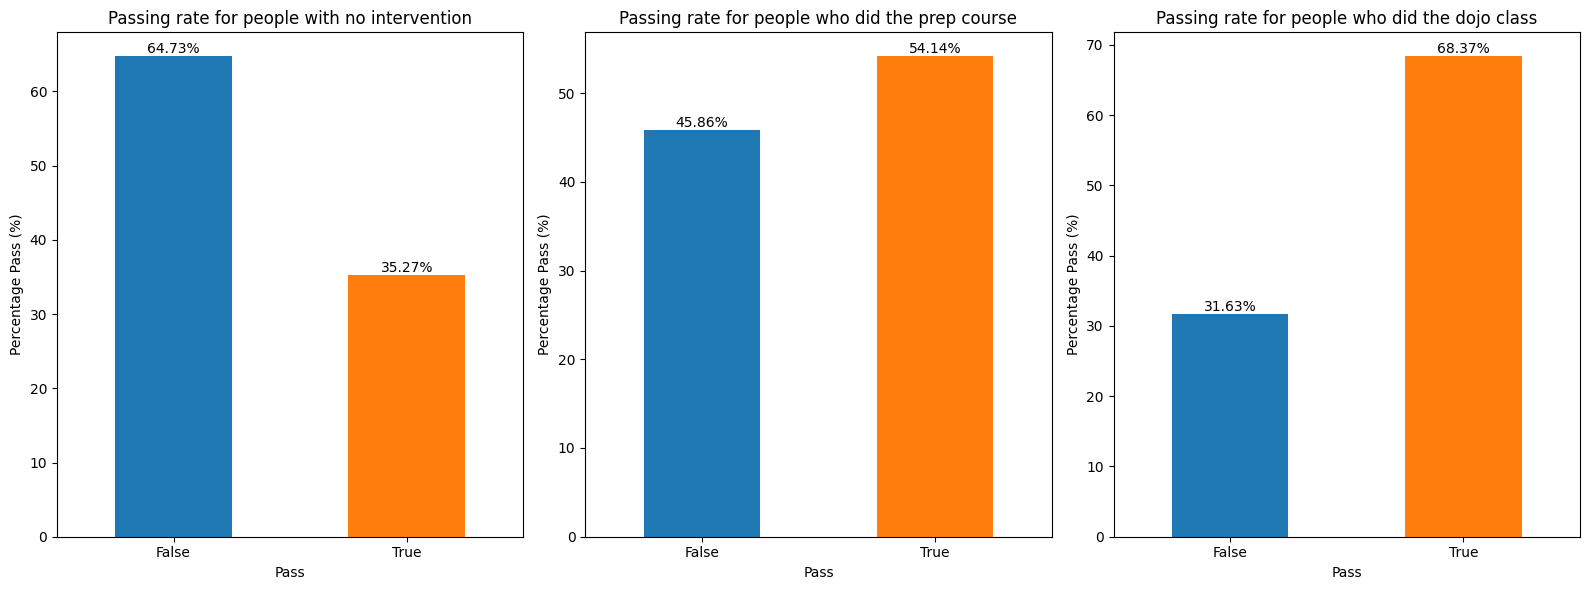

In [218]:
# Create a grid of subplots
fig, axes = plt.subplots(ncols=3, figsize=(16, 6))
colors = ['#1f77b4', '#ff7f0e']  # Define colors for the bars

# Bar plot for people with no intervention
ax = df_no_class_pass_count_percentage.plot(kind='bar', color=colors, ax=axes[0])
ax.bar_label(ax.containers[0], fmt='%2.2f%%')  # Add labels to the bars with percentage sign
axes[0].set_xlabel("Pass")
axes[0].set_ylabel("Percentage Pass (%)")
axes[0].set_title("Passing rate for people with no intervention")
axes[0].tick_params(axis='x', rotation=0)  # Rotate x-axis labels

# Change x-axis tick labels to 'False' and 'True' for the first subplot
axes[0].set_xticklabels(['False', 'True'])

# Bar plot for passing rate for people who did the prep course
ax = df_prep_pass_count_percentage.plot(kind='bar', color=colors, ax=axes[1])
ax.bar_label(ax.containers[0], fmt='%2.2f%%')  # Add labels to the bars with percentage sign
axes[1].set_xlabel("Pass")
axes[1].set_ylabel("Percentage Pass (%)")
axes[1].set_title("Passing rate for people who did the prep course")
axes[1].tick_params(axis='x', rotation=0)  # Rotate x-axis labels

# Change x-axis tick labels to 'False' and 'True' for the second subplot
axes[1].set_xticklabels(['False', 'True'])

# Bar plot for passing rate for people who did the dojo class
ax = df_dojo_pass_count_percentage.plot(kind='bar', color=colors, ax=axes[2])
ax.bar_label(ax.containers[0], fmt='%2.2f%%')  # Add labels to the bars with percentage sign
axes[2].set_xlabel("Pass")
axes[2].set_ylabel("Percentage Pass (%)")
axes[2].set_title("Passing rate for people who did the dojo class")
axes[2].tick_params(axis='x', rotation=0)  # Rotate x-axis labels

# Change x-axis tick labels to 'False' and 'True' for the third subplot
axes[2].set_xticklabels(['False', 'True'])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

Passing rate without an intervention is really low, only 35.27% pass, the prep course leads so a significantly higher passing rate of 54.14% and the dojo class leads to an even higher passing rate of 68.37%.

### <a id='3.3'>Task 3: Identify any other interesting trends from the data set and offer some analysis to their importance</a>

### Hypothesis: study time has influence on passing the test

Checking how many different values exist for df['hours_studied']:

In [220]:
df['hours_studied'].nunique()

3019

A lot of different values, converting floats to integers to round the values and lower the number of unique values:

In [221]:
df['hours_studied_int'] = df['hours_studied'].round().astype(int)

C:\Users\49176\AppData\Local\Temp\ipykernel_38600\2134036579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_studied_int'] = df['hours_studied'].round().astype(int)


In [222]:
df['hours_studied_int'].nunique()

24

After rounding the hours there is a reasonable amount of unique hour values for visualisations.

Creating dataframe df_study_pass with 'hours_studied_int' and 'pass'

In [223]:
df_study_pass = df[['hours_studied_int', 'pass']]
df_study_pass

,hours_studied_int,pass
0,11,True
1,8,True
2,4,True
3,4,True
4,3,False
...,...,...
3882,3,True
3883,2,False
3884,5,False
3885,2,True


Groupby of hours_studied_int followed by a valued count of 'pass' and imputing NaN values with zero:

In [224]:
df_study_pass_grouped = df_study_pass.groupby('hours_studied_int')

df_study_pass_grouped_counts = df_study_pass_grouped['pass'].value_counts().unstack()
df_study_pass_grouped_counts.fillna(0, inplace=True)
df_study_pass_grouped_counts

pass,False,True
hours_studied_int,,
0,11.0,6.0
1,180.0,88.0
2,269.0,173.0
3,250.0,195.0
4,673.0,641.0
5,175.0,168.0
6,148.0,117.0
7,107.0,106.0
8,76.0,96.0


The hours studied are centered at 1 to 8 hours with a highly dominant value of 4 hours with 1300 entries.
The hours increase to 24 with a decreasing value count, which starts to be lower than 100 entries after 10 hours and lower than 10 entries after 15 hours with only 1 entry for 19,22,23 and 24 hours.

Visualisations:

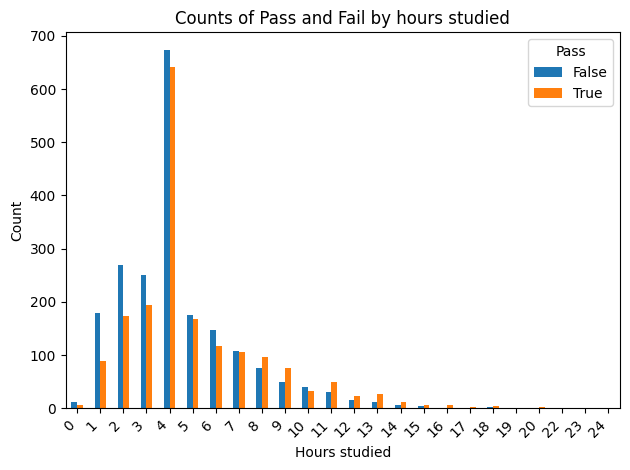

In [225]:
# Create a bar plot
df_study_pass_grouped_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Hours studied')
plt.ylabel('Count')
plt.title('Counts of Pass and Fail by hours studied')

# Show the legend
plt.legend(title='Pass', labels=['False', 'True'], loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

With relative values:

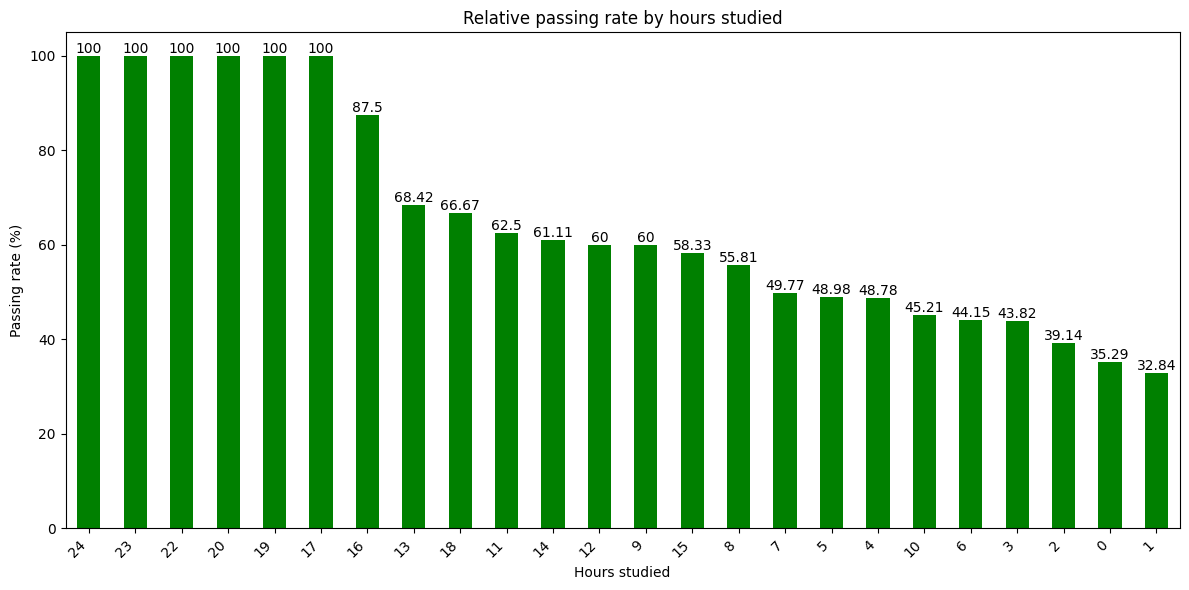

In [230]:
# Create a figure with a broader width
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the percentage of 'True' values (Pass) per Age
percentage_pass_study = (df_study_pass_grouped_counts[True] / (df_study_pass_grouped_counts[True] + df_study_pass_grouped_counts[False])) * 100

# Sort the countries in descending order by the percentage of Pass
percentage_pass_study = percentage_pass_study.sort_values(ascending=False)
percentage_pass_study = percentage_pass_study.round(2)

# Create a bar plot for the percentage of Pass per Age
ax = percentage_pass_study.plot(kind='bar', color='green')
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Hours studied')
plt.ylabel('Passing rate (%)')
plt.title('Relative passing rate by hours studied')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()  

Visualisation of relative amount of pass depending on hours studied with a scatter plot:

In [227]:
df_percentage_pass_study = percentage_pass_study.reset_index(name="relative amount of pass")

In [228]:
df_percentage_pass_study

,hours_studied_int,relative amount of pass
0,24,100.00
1,23,100.00
2,22,100.00
3,20,100.00
4,19,100.00
5,17,100.00
6,16,87.50
7,13,68.42
8,18,66.67
9,11,62.50


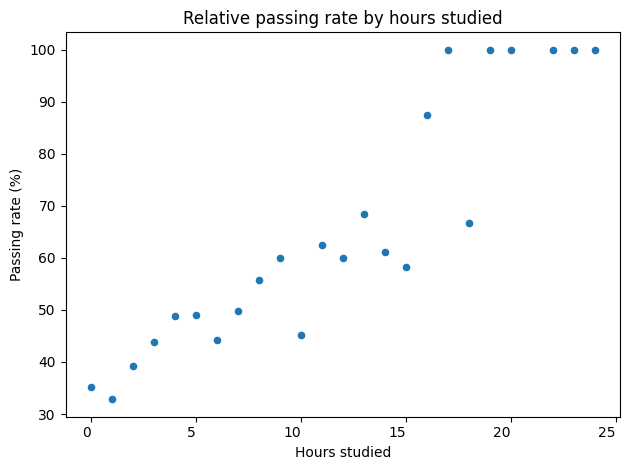

In [229]:
df_percentage_pass_study.plot(kind='scatter', x = 'hours_studied_int', y = 'relative amount of pass')

# Customize the plot
plt.xlabel('Hours studied')
plt.ylabel('Passing rate (%)')
plt.title('Relative passing rate by hours studied')

# Rotate x-axis labels for better readability (optional)
plt.xticks(ha='right')

# Show the plot
plt.tight_layout()
plt.show()

It can be seen that there is a very strong correlation between hours studied and passing the test.

From 0 to 15 hours there is a positive linear correlation and the passing rate rises from 32% to 60% and 
for 17 hours and 19 hours and higher the passing rate is 100%. 
However, it is important to note that the number of entries is centered at 1 to 8 hours and the entries decrease drastically aftewards 
with less then 10 entries after 15 hours.
This means the values after 15 hours are statistically not very meaningful.

# <a id='4'> Part 2: Model Creation </a>

Create a model that can predict whether or not a student will pass the test. Use the provided data set to train your model and test its accuracy. You have free choice of programming language, algorithm, and tools.

### <a id='4.1'>Functions for evaluation</a>

In [227]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test):
    # Print accuracy of our model for train and test set
    print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
    print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test), 2))
    print("--------" * 10)

    # Print classification report of our model for train data
    print("Classification for train data:")
    print(classification_report(y_train, y_pred_train))
    print("--------" * 10)

    # Print classification report of our model for test data
    print("Classification for test data:")
    print(classification_report(y_test, y_pred_test))
    print("--------" * 10)

    # Evaluate the model with a confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

     # Plot smaller heatmap
    heatmap_size=(8, 6)
    fig, ax = plt.subplots(figsize=heatmap_size)
    sns.heatmap(cm, annot=True, cmap='YlOrRd',
                yticklabels=['Actual negative', 'Actual positive'],
                xticklabels=['Predicted negative', 'Predicted positive'], ax=ax)
    plt.show()

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob):
    # # Print accuracy of our model for train and test set
    # print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train_prob >= 0.5), 2))
    # print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test_prob >= 0.5), 2))
    # print("--------" * 10)

    # # Print classification report of our model for train data
    # print("Classification for train data:")
    # print(classification_report(y_train, y_pred_train_prob >= 0.5))
    # print("--------" * 10)

    # # Print classification report of our model for test data
    # print("Classification for test data:")
    # print(classification_report(y_test, y_pred_test_prob >= 0.5))
    # print("--------" * 10)

    # Evaluate the model with ROC curves and ROC AUC scores
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_prob)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_prob)
    roc_auc_train = roc_auc_score(y_train, y_pred_train_prob)
    roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)

    # Plot ROC curves
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_train:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train)')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_test:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test)')
    plt.legend(loc="lower right")

    plt.show()

### <a id='4.2'>Defining features X and target y and train-test-split</a>

In [159]:
# Select X and y features
X = df_enc.drop(['pass'], axis = 1)
y = df_enc['pass']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Check the shape of the data sets
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)  
print("X_test:", X_test.shape) 
print("y_test:", y_test.shape) 

X_train: (2720, 7)
y_train: (2720,)
X_test: (1167, 7)
y_test: (1167,)


### <a id='4.3'>Feature scaling</a>

In [160]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

### Binary classification: 

### <a id='4.4'>Logistic regression as first model</a>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [241]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [242]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

With scaled features:

In [224]:
# Logistic Regression
log_reg_ = LogisticRegression(max_iter=1000, random_state=42)
log_reg_.fit(X_train_, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [225]:
y_pred_train_ = log_reg_.predict(X_train_)
y_pred_test_ = log_reg_.predict(X_test_)

Evaluation:

Accuracy on train set: 0.68
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.67      0.79      0.73      1436
        True       0.71      0.56      0.62      1284

    accuracy                           0.68      2720
   macro avg       0.69      0.68      0.68      2720
weighted avg       0.69      0.68      0.68      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.77      0.72       616
        True       0.69      0.58      0.63       551

    accuracy                           0.68      1167
   macro avg       0.68      0.67      0.67      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

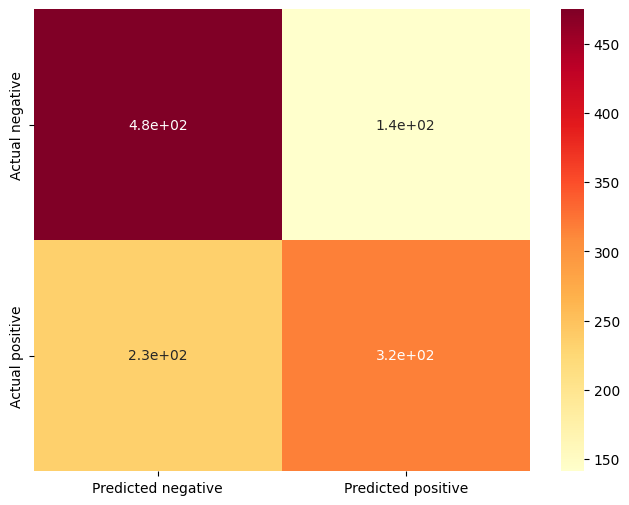

In [228]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Not bad, but true recall values are not good.

Hyperparameter optimization with GridSearchCV:

In [56]:
from sklearn.model_selection import GridSearchCV

Defining parameter grid:

In [57]:
param_logreg = {'penalty':('l1','l2'),
                'C': [0.001, 0.01, 0.1, 1, 10],
                'solver': ['liblinear', 'newton-cg', 'lbfgs','sag','saga'],
                'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                'class_weight': [None, 'balanced'],
                'random_state': [42]
               }

 With scoring = 'accuracy'

In [58]:
# Create GridSearchCV Object:
logreg_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='accuracy', cv=5)

In [61]:
# Create the GridSearchCV object
grid_search_ = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='accuracy', cv=5)

In [62]:
# Fit the grid search to the data
grid_search_.fit(X_train_, y_train)

c:\Users\49176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1500 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\49176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\49176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ('l1', 'l2'), 'random_state': [42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [68]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search_.best_params_)
print("Best Cross-Validation Score:", grid_search_.best_score_)

Best Parameters: {'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.6602941176470589


In [69]:
# Save best estimator (including fitted preprocessing steps) as best_model_ for grid search with scaled features 
gridsearcha_acc_model_logreg_scaled = grid_search_.best_estimator_

In [70]:
# Calculating the accuracy, recall and precision for the train and test set with the optimized model with scaled features

y_pred_train_ = gridsearcha_acc_model_logreg_scaled.predict(X_train_) 

y_pred_test_= gridsearcha_acc_model_logreg_scaled.predict(X_test_)

Accuracy on train set: 0.66
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.65      0.76      0.70      1436
        True       0.67      0.55      0.60      1284

    accuracy                           0.66      2720
   macro avg       0.66      0.65      0.65      2720
weighted avg       0.66      0.66      0.65      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.65      0.75      0.70       616
        True       0.66      0.56      0.61       551

    accuracy                           0.66      1167
   macro avg       0.66      0.65      0.65      1167
weighted avg       0.66      0.66      0.65      1167

--------------------------------------------------------------------

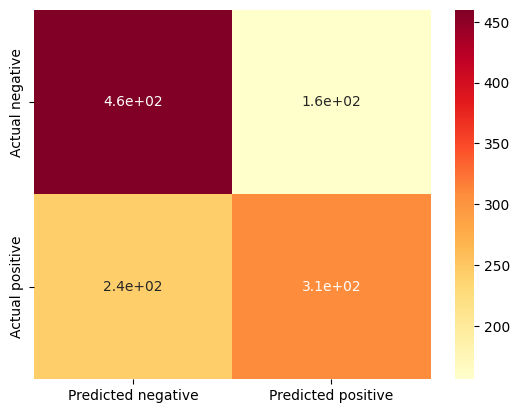

In [71]:
evaluate_classification_model(y_train, y_test, y_pred_train_, y_pred_test_) 

No improvement, looks similar than before

With Optuna:

In [72]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10 , n_repeats=5, random_state=42)

In [73]:
import optuna 

In [74]:
# Creating an Objective Function

def objective_logreg(trial):
    
    # Define hyperparameters
    param_logr = {'C' : trial.suggest_float("C", 0.001, 10.0, log=True),
    'solver' : trial.suggest_categorical('solver',["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
    'max_iter' : trial.suggest_int("max_iter", 1, 10000)
    }

    # Create and train the model
    lr = LogisticRegression(**param_logr,random_state=42)
    lr.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(lr, X_train_, y_train, cv=cv, scoring="accuracy").mean()

    return score


In [75]:
# Creating and running the optimization

study_lr = optuna.create_study(direction='maximize',study_name = "logr")
study_lr.optimize(objective_logreg, n_trials=200)

[I 2023-11-07 01:18:17,428] A new study created in memory with name: logr
[I 2023-11-07 01:18:18,161] Trial 0 finished with value: 0.6535294117647058 and parameters: {'C': 0.018316917723598093, 'solver': 'newton-cg', 'max_iter': 9400}. Best is trial 0 with value: 0.6535294117647058.
[I 2023-11-07 01:18:18,728] Trial 1 finished with value: 0.6524264705882352 and parameters: {'C': 1.4107652798777501, 'solver': 'saga', 'max_iter': 4031}. Best is trial 0 with value: 0.6535294117647058.
[I 2023-11-07 01:18:19,434] Trial 2 finished with value: 0.6525 and parameters: {'C': 0.8380584108390003, 'solver': 'sag', 'max_iter': 1150}. Best is trial 0 with value: 0.6535294117647058.
[I 2023-11-07 01:18:19,897] Trial 3 finished with value: 0.6530882352941176 and parameters: {'C': 0.07328925846714024, 'solver': 'lbfgs', 'max_iter': 2200}. Best is trial 0 with value: 0.6535294117647058.
[I 2023-11-07 01:18:20,335] Trial 4 finished with value: 0.6527941176470589 and parameters: {'C': 0.010299660727764079

In [76]:
# Evaluating the Optuna Trial
print("Best trial:", study_lr.best_trial.number)
print("Best accuracy score:", study_lr.best_trial.value)
print("Best hyperparameters:", study_lr.best_params) 

Best trial: 91
Best accuracy score: 0.6549264705882352
Best hyperparameters: {'C': 0.0011308086120584932, 'solver': 'liblinear', 'max_iter': 2407}


In [77]:
best_param_optuna = study_lr.best_params

In [78]:
optuna_model = LogisticRegression(**best_param_optuna).fit(X_train_,y_train)
y_pred_train_optuna = optuna_model.predict(X_train_)
y_pred_test_optuna = optuna_model.predict(X_test_)

Accuracy on train set: 0.66
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.65      0.76      0.70      1436
        True       0.67      0.55      0.60      1284

    accuracy                           0.66      2720
   macro avg       0.66      0.65      0.65      2720
weighted avg       0.66      0.66      0.65      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.65      0.75      0.70       616
        True       0.66      0.56      0.61       551

    accuracy                           0.66      1167
   macro avg       0.66      0.65      0.65      1167
weighted avg       0.66      0.66      0.65      1167

--------------------------------------------------------------------

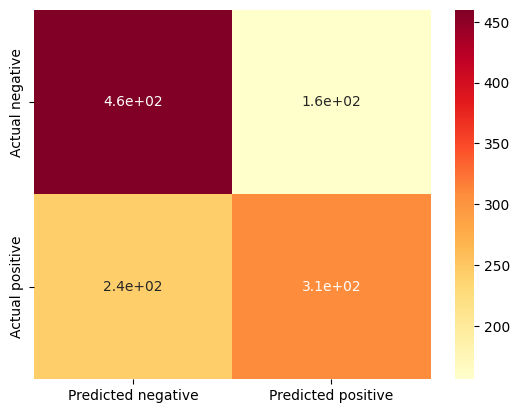

In [79]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Still no real improvement and quite similar results.

Would make sense to try out different models for classification, 
e.g. KNN, decision trees, random forest, SVM, neural networks, boosting, bagging and stacking

## <a id='4.5'>KNN</a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# Train model
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train_, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [82]:
# Predict on train set and test set
y_pred_train = knn.predict(X_train_)
y_pred_test = knn.predict(X_test_) 

Accuracy on train set: 0.71
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.69      0.81      0.75      1436
        True       0.74      0.60      0.66      1284

    accuracy                           0.71      2720
   macro avg       0.71      0.70      0.70      2720
weighted avg       0.71      0.71      0.71      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.73      0.70       616
        True       0.66      0.59      0.63       551

    accuracy                           0.66      1167
   macro avg       0.66      0.66      0.66      1167
weighted avg       0.66      0.66      0.66      1167

--------------------------------------------------------------------

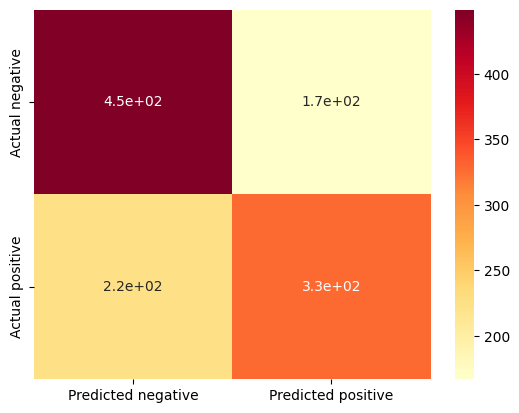

In [83]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Looks better than logistic regression, GridSearchCV hyperparameter optimisation:

In [84]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Test different weight functions
    'p': [1, 2],  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'leaf_size': [20, 30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use for the tree
    'n_jobs': [-1]  # Use all processors for parallel execution
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=10),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [85]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 40, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.6544117647058824


In [86]:
# Save best estimator (including fitted preprocessing steps) as best_model 
gridsearch_acc_model_knn = grid_search.best_estimator_

In [97]:
# Saving the model
import joblib
joblib.dump(gridsearch_acc_model_knn, 'gridsearch_acc_model_knn.pkl')

['gridsearch_acc_model_knn.pkl']

In [98]:
loaded_model = joblib.load('gridsearch_acc_model_knn.pkl')

In [87]:
y_pred_train_ = gridsearch_acc_model_knn.predict(X_train_) 

y_pred_test_= gridsearch_acc_model_knn.predict(X_test_)

In [99]:
y_pred_train_ = loaded_model.predict(X_train_) 

y_pred_test_= loaded_model.predict(X_test_)

Accuracy on train set: 0.7
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.72      0.71      0.71      1436
        True       0.68      0.70      0.69      1284

    accuracy                           0.70      2720
   macro avg       0.70      0.70      0.70      2720
weighted avg       0.70      0.70      0.70      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.65      0.67       616
        True       0.64      0.68      0.66       551

    accuracy                           0.66      1167
   macro avg       0.66      0.66      0.66      1167
weighted avg       0.67      0.66      0.66      1167

---------------------------------------------------------------------

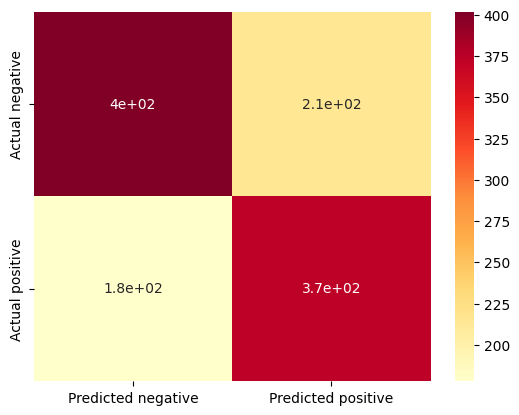

In [100]:
evaluate_classification_model(y_train, y_test, y_pred_train_, y_pred_test_)

So far the best model with quite decent metrics.

Optimisation with Optuna with scoring = "accuracy":

In [113]:
import optuna
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10 , n_repeats=5, random_state=42)

In [109]:
def objective_knn(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = KNeighborsClassifier(**param_knn)
    knn.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train_, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [114]:
study_knn = optuna.create_study(direction='maximize',study_name = "KNN")
study_knn.optimize(objective_knn, n_trials=200)

[I 2023-11-14 18:17:14,970] A new study created in memory with name: KNN
[I 2023-11-14 18:17:16,717] Trial 0 finished with value: 0.6259558823529412 and parameters: {'n_neighbors': 35, 'weights': 'distance', 'metric': 'manhattan', 'p': 40, 'algorithm': 'ball_tree', 'leaf_size': 49}. Best is trial 0 with value: 0.6259558823529412.
[I 2023-11-14 18:17:22,048] Trial 1 finished with value: 0.6264705882352941 and parameters: {'n_neighbors': 78, 'weights': 'distance', 'metric': 'minkowski', 'p': 34, 'algorithm': 'auto', 'leaf_size': 76}. Best is trial 1 with value: 0.6264705882352941.
[I 2023-11-14 18:17:23,433] Trial 2 finished with value: 0.6301470588235294 and parameters: {'n_neighbors': 69, 'weights': 'distance', 'metric': 'euclidean', 'p': 42, 'algorithm': 'auto', 'leaf_size': 61}. Best is trial 2 with value: 0.6301470588235294.
[I 2023-11-14 18:17:33,074] Trial 3 finished with value: 0.6582352941176469 and parameters: {'n_neighbors': 99, 'weights': 'uniform', 'metric': 'minkowski', 'p'

In [115]:
print("Best trial:", study_knn.best_trial.number)
print("Best accuracy score:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 186
Best accuracy score: 0.6734558823529412
Best hyperparameters: {'n_neighbors': 42, 'weights': 'uniform', 'metric': 'minkowski', 'p': 10, 'algorithm': 'brute', 'leaf_size': 93}


In [116]:
best_param_knn = study_knn.best_params
KNN = KNeighborsClassifier(**best_param_knn).fit(X_train_,y_train)
y_pred_train_optuna = KNN.predict(X_train_)
y_pred_test_optuna = KNN.predict(X_test_)

Accuracy on train set: 0.69
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.71      0.72      0.71      1436
        True       0.68      0.66      0.67      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.70      0.71      0.70       616
        True       0.67      0.66      0.66       551

    accuracy                           0.68      1167
   macro avg       0.68      0.68      0.68      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

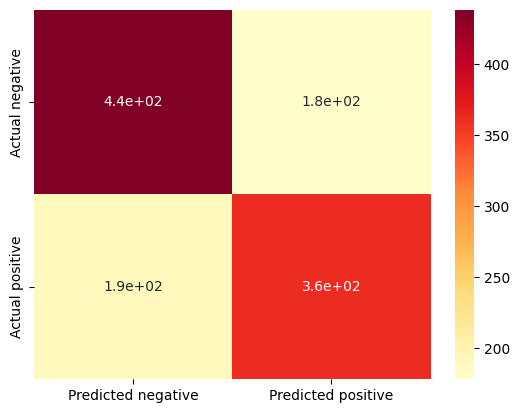

In [117]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Small improvement, so far the best model, saving it:

In [118]:
# Saving the model
import joblib
joblib.dump(KNN, 'optuna_acc_model_knn.pkl')

['optuna_acc_model_knn.pkl']

Optimisation with Optuna with scoring = "f1":

In [213]:
def objective_knn_2(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = KNeighborsClassifier(**param_knn)
    knn.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train_, y_train, cv=cv, scoring="f1").mean()

    return score


In [120]:
study_knn = optuna.create_study(direction='maximize',study_name = "KNN_2")
study_knn.optimize(objective_knn_2, n_trials=200)

[I 2023-11-14 18:42:46,236] A new study created in memory with name: KNN_2
[I 2023-11-14 18:42:50,032] Trial 0 finished with value: 0.6252103606237269 and parameters: {'n_neighbors': 70, 'weights': 'uniform', 'metric': 'euclidean', 'p': 26, 'algorithm': 'auto', 'leaf_size': 84}. Best is trial 0 with value: 0.6252103606237269.
[I 2023-11-14 18:43:00,924] Trial 1 finished with value: 0.5786025244142037 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'minkowski', 'p': 13, 'algorithm': 'ball_tree', 'leaf_size': 73}. Best is trial 0 with value: 0.6252103606237269.
[I 2023-11-14 18:43:01,826] Trial 2 finished with value: 0.601227393512005 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'metric': 'minkowski', 'p': 2, 'algorithm': 'brute', 'leaf_size': 37}. Best is trial 0 with value: 0.6252103606237269.
[I 2023-11-14 18:43:03,982] Trial 3 finished with value: 0.6354957663769706 and parameters: {'n_neighbors': 61, 'weights': 'uniform', 'metric': 'euclidean', 'p'

In [121]:
print("Best trial:", study_knn.best_trial.number)
print("Best F1 score:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 172
Best F1 score: 0.6527501971621138
Best hyperparameters: {'n_neighbors': 33, 'weights': 'uniform', 'metric': 'minkowski', 'p': 37, 'algorithm': 'brute', 'leaf_size': 16}


In [122]:
best_param_knn = study_knn.best_params
KNN_2 = KNeighborsClassifier(**best_param_knn).fit(X_train_,y_train)
y_pred_train_optuna = KNN_2.predict(X_train_)
y_pred_test_optuna = KNN_2.predict(X_test_)

Accuracy on train set: 0.69
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.71      0.69      0.70      1436
        True       0.67      0.68      0.68      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.70      0.68      0.69       616
        True       0.65      0.68      0.66       551

    accuracy                           0.68      1167
   macro avg       0.68      0.68      0.68      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

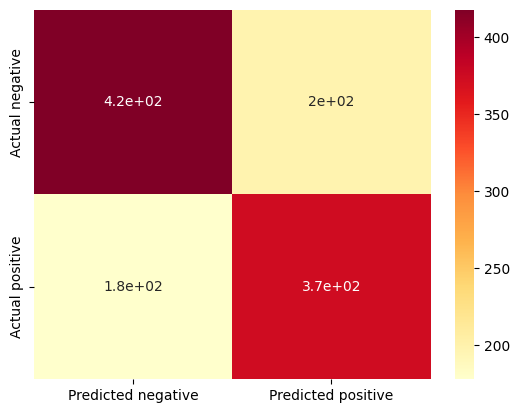

In [123]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Previous optuna optimisation with scoring = "accuracy" had slightly better results.

Optimisation with Optuna with scoring = "recall":

In [214]:
def objective_knn_3(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = KNeighborsClassifier(**param_knn)
    knn.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train_, y_train, cv=cv, scoring="recall").mean()

    return score

In [215]:
study_knn = optuna.create_study(direction='maximize',study_name = "KNN_3")
study_knn.optimize(objective_knn_3, n_trials=200)

[I 2023-11-15 00:15:59,830] A new study created in memory with name: KNN_3
[I 2023-11-15 00:16:02,007] Trial 0 finished with value: 0.6003176263047849 and parameters: {'n_neighbors': 78, 'weights': 'distance', 'metric': 'manhattan', 'p': 25, 'algorithm': 'ball_tree', 'leaf_size': 84}. Best is trial 0 with value: 0.6003176263047849.
[I 2023-11-15 00:16:04,058] Trial 1 finished with value: 0.5923746238435935 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'euclidean', 'p': 20, 'algorithm': 'auto', 'leaf_size': 34}. Best is trial 0 with value: 0.6003176263047849.
[I 2023-11-15 00:16:05,709] Trial 2 finished with value: 0.6002388781017641 and parameters: {'n_neighbors': 67, 'weights': 'distance', 'metric': 'manhattan', 'p': 32, 'algorithm': 'brute', 'leaf_size': 48}. Best is trial 0 with value: 0.6003176263047849.
[I 2023-11-15 00:16:06,992] Trial 3 finished with value: 0.601391751521925 and parameters: {'n_neighbors': 31, 'weights': 'distance', 'metric': 'euclidean', '

In [216]:
print("Best trial:", study_knn.best_trial.number)
print("Best recall score:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 24
Best recall score: 0.6623645611602385
Best hyperparameters: {'n_neighbors': 27, 'weights': 'uniform', 'metric': 'minkowski', 'p': 7, 'algorithm': 'auto', 'leaf_size': 77}


In [218]:
best_param_knn = study_knn.best_params
KNN_3 = KNeighborsClassifier(**best_param_knn).fit(X_train_,y_train)
y_pred_train_optuna = KNN_3.predict(X_train_)
y_pred_test_optuna = KNN_3.predict(X_test_)

Accuracy on train set: 0.7
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.72      0.70      0.71      1436
        True       0.68      0.69      0.69      1284

    accuracy                           0.70      2720
   macro avg       0.70      0.70      0.70      2720
weighted avg       0.70      0.70      0.70      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.66      0.67       616
        True       0.64      0.67      0.65       551

    accuracy                           0.66      1167
   macro avg       0.66      0.67      0.66      1167
weighted avg       0.67      0.66      0.67      1167

---------------------------------------------------------------------

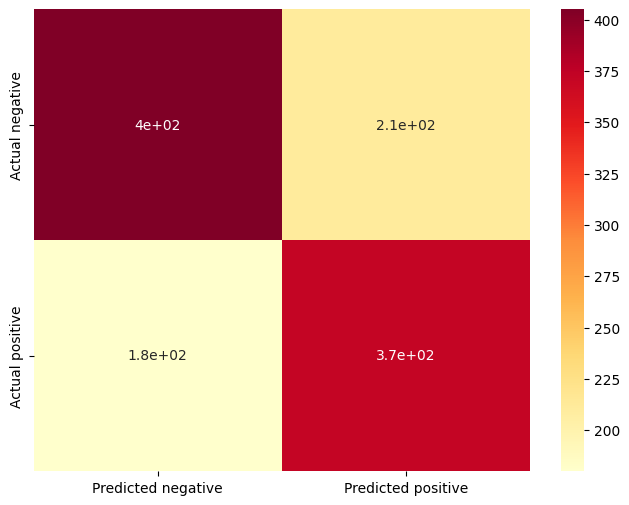

In [229]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Slightly worse than before

## <a id='4.6'>Multilayer perceptron</a>

In [89]:
from sklearn.neural_network import MLPClassifier

In [90]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    # Other hyperparameters related to the optimization process
}

# Create the model
mlp = MLPClassifier(max_iter=1000)

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train_, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1]})

In [91]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
Best Cross-Validation Score: 0.676473069811855


In [92]:
# Save best estimator (including fitted preprocessing steps) as best_model 
gridsearch_acc_model_mlp = grid_search.best_estimator_

In [96]:
# Saving the model:
import joblib
joblib.dump(gridsearch_acc_model_mlp, 'gridsearch_acc_model_mlp.pkl')

['gridsearch_acc_model_mlp.pkl']

In [93]:
y_pred_train_ = gridsearch_acc_model_mlp.predict(X_train_) 

y_pred_test_= gridsearch_acc_model_mlp.predict(X_test_)

Accuracy on train set: 0.69
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.72      0.69      0.70      1436
        True       0.67      0.69      0.68      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.70      0.67      0.68       616
        True       0.65      0.67      0.66       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

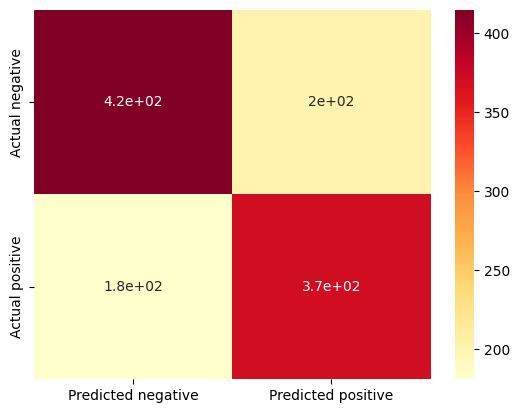

In [94]:
evaluate_classification_model(y_train, y_test, y_pred_train_, y_pred_test_)

As good as KNN, but computanially a lot more expensive.

## <a id='4.7'>XGBoost</a>

In [101]:
import xgboost as xgb

In [102]:
# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)

# Fitting the model
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [103]:
y_pred_train = xgb_model.predict(X_train_)
y_pred_test = xgb_model.predict(X_test_)

Accuracy on train set: 0.87
Accuracy on test set: 0.65
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.86      0.89      0.88      1436
        True       0.87      0.84      0.85      1284

    accuracy                           0.87      2720
   macro avg       0.87      0.86      0.86      2720
weighted avg       0.87      0.87      0.87      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.66      0.67       616
        True       0.63      0.64      0.63       551

    accuracy                           0.65      1167
   macro avg       0.65      0.65      0.65      1167
weighted avg       0.65      0.65      0.65      1167

--------------------------------------------------------------------

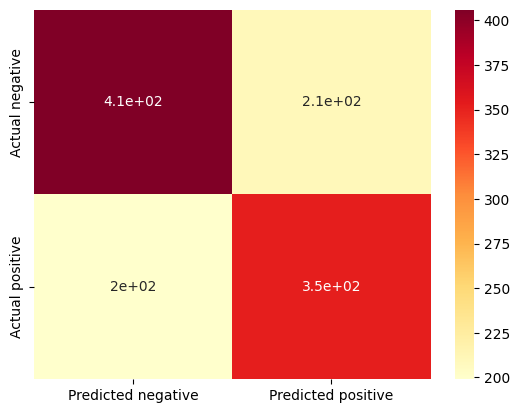

In [104]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Overfitting, hyperparameters must be changed:

In [105]:
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=1,
    max_depth=3,  # Reduce tree depth
    min_child_weight=4,  # Increase min_child_weight
    gamma=13,  # Increase gamma
    subsample=0.4,  # Reduce subsample
    colsample_bytree=0.4  # Reduce colsample_bytree
)

In [106]:
# Fitting the model
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=13, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [107]:
y_pred_train = xgb_model.predict(X_train_)
y_pred_test = xgb_model.predict(X_test_)

Accuracy on train set: 0.67
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.67      0.76      0.71      1436
        True       0.68      0.57      0.62      1284

    accuracy                           0.67      2720
   macro avg       0.67      0.67      0.67      2720
weighted avg       0.67      0.67      0.67      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.74      0.70       616
        True       0.67      0.59      0.63       551

    accuracy                           0.67      1167
   macro avg       0.67      0.66      0.66      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

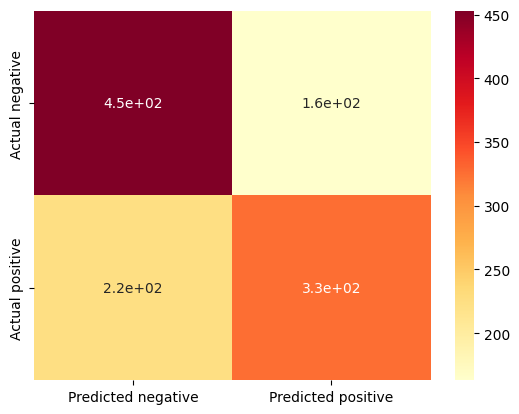

In [108]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

True recall values are not great, RandomizedSearchCV hyperparameter optimization:

In [95]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=1,random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Creating RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Use appropriate metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fitting the RandomizedSearchCV object
random_search.fit(X_train_, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Fit the best model to the data
best_xgb_model.fit(X_train_, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [96]:
y_pred_train = best_xgb_model.predict(X_train_)
y_pred_test = best_xgb_model.predict(X_test_)

Accuracy on train set: 0.73
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.71      0.81      0.76      1436
        True       0.74      0.64      0.69      1284

    accuracy                           0.73      2720
   macro avg       0.73      0.72      0.72      2720
weighted avg       0.73      0.73      0.72      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.74      0.70       616
        True       0.67      0.60      0.63       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

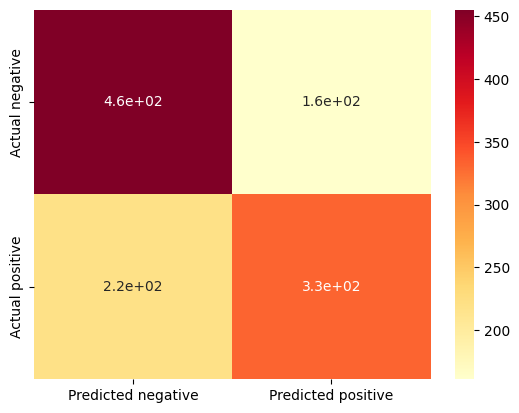

In [97]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Positive recall for test data is not so good, GridSearchCV:

In [98]:
# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Creating GridSearchCV object
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use appropriate metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Performing GridSearchCV training
grid_search.fit(X_train_, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Fit the best model to the data
best_xgb_model.fit(X_train_, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [99]:
y_pred_train = best_xgb_model.predict(X_train_)
y_pred_test = best_xgb_model.predict(X_test_)

Accuracy on train set: 0.68
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.68      0.77      0.72      1436
        True       0.70      0.59      0.64      1284

    accuracy                           0.68      2720
   macro avg       0.69      0.68      0.68      2720
weighted avg       0.69      0.68      0.68      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.75      0.71       616
        True       0.68      0.59      0.63       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

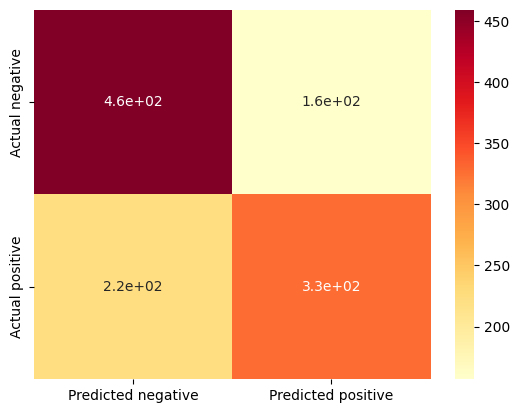

In [100]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Quite similar to RandomizedSearchCV, positive recall is not good.

## <a id='4.8'>SVM</a>

In [29]:
from sklearn.svm import SVC

In [31]:
# Create an SVM classifier with various parameters
svm_classifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
                     cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
                     break_ties=False, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_, y_train)

SVC(random_state=42)

In [32]:
y_pred_train = svm_classifier.predict(X_train_) 
y_pred_test = svm_classifier.predict(X_test_)

Accuracy on train set: 0.69
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.69      0.76      0.72      1436
        True       0.70      0.62      0.66      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.74      0.71       616
        True       0.68      0.62      0.65       551

    accuracy                           0.68      1167
   macro avg       0.68      0.68      0.68      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

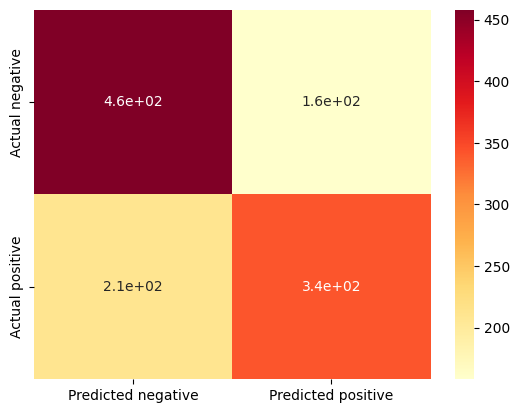

In [33]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Not bad, but True recall values are not great, RandomizedSearchCV hyperparameter optimisation:

In [101]:
# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Define the hyperparameters and their potential values for the grid search
param_dist  = {
    'C': [0.1, 1, 10, 100],  # Different values for the regularization parameter C
    'kernel': ['linear', 'rbf', 'poly'],  # Different types of kernels
    'gamma': ['scale', 'auto', 0.1, 1],  # Different values for gamma
    #'degree': [2, 3, 4],  # Different degrees for the polynomial kernel
    'coef0': [0.0, 0.5]  # Different values for the independent term in the polynomial and sigmoid kernels
    # Add more parameters and values as needed
}

# Create GridSearchCV
rand_cv = RandomizedSearchCV(svm_classifier, param_distributions=param_dist,n_iter=50, cv=5, scoring='accuracy',n_jobs=-1, verbose=10, random_state=42)
rand_cv.fit(X_train_, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.5],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=10)

In [102]:
# Get the best parameters and the best score
best_params = rand_cv.best_params_
best_score = rand_cv.best_score_

# Train a new SVM classifier with the best parameters found
best_svm = SVC(**best_params)
best_svm.fit(X_train_, y_train)

SVC(C=1, coef0=0.5, gamma=0.1, kernel='poly')

Accuracy on train set: 0.68
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.68      0.77      0.72      1436
        True       0.70      0.59      0.64      1284

    accuracy                           0.68      2720
   macro avg       0.69      0.68      0.68      2720
weighted avg       0.69      0.68      0.68      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.75      0.71       616
        True       0.68      0.59      0.63       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

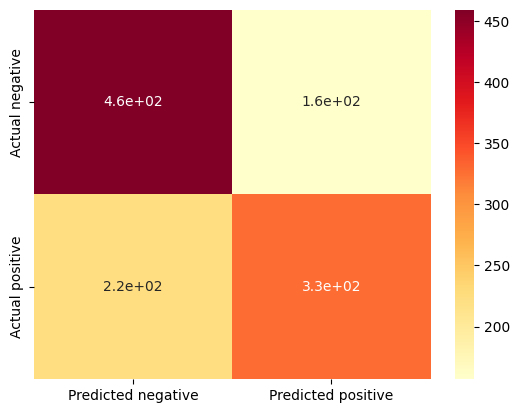

In [103]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Positive recall is not so good.

## <a id='4.9'>Lightgbm</a>

In [44]:
import lightgbm as lgbm

In [45]:
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [46]:
# Define and train the LightGBM model
lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train_, y_train)

# Predict on the training and test sets
y_pred_train = lgb_model.predict(X_train_)
y_pred_test = lgb_model.predict(X_test_)

[LightGBM] [Info] Number of positive: 1284, number of negative: 1436
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 2720, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Accuracy on train set: 0.79
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      1436
        True       0.78      0.77      0.77      1284

    accuracy                           0.79      2720
   macro avg       0.79      0.79      0.79      2720
weighted avg       0.79      0.79      0.79      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.68      0.65      0.67       616
        True       0.63      0.66      0.65       551

    accuracy                           0.66      1167
   macro avg       0.66      0.66      0.66      1167
weighted avg       0.66      0.66      0.66      1167

--------------------------------------------------------------------

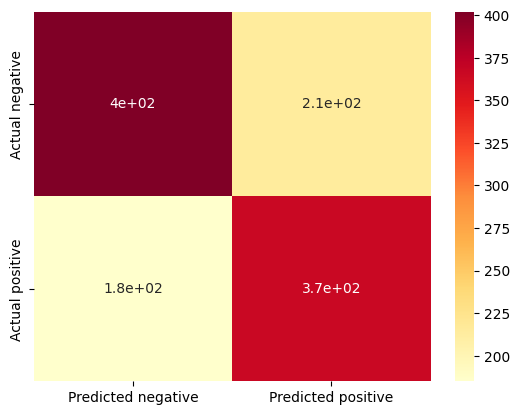

In [47]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Overfitting, RandomizedSearchCV:

In [60]:
# Define the parameter grid
param_dist = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
}

# Create the LightGBM classifier
lgb_model = lgbm.LGBMClassifier(class_weight='balanced')

# Perform RandomizedSearchCV
rand_cv = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, n_iter=50,
                             cv=5, scoring='f1', n_jobs=-1, verbose=10)

# Fit the model
rand_cv.fit(X_train_, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[LightGBM] [Info] Number of positive: 1284, number of negative: 1436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 2720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000213C30DE210>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000213C32123D0>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='f1', verbose=10)

In [61]:
# Get the best parameters
best_params = rand_cv.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42, **best_params)
best_lgb_model.fit(X_train_, y_train)

# Make predictions
y_pred_train = best_lgb_model.predict(X_train_)
y_pred_test = best_lgb_model.predict(X_test_)

Best parameters: {'colsample_bytree': 0.6, 'min_child_samples': 480, 'num_leaves': 23, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.7}
[LightGBM] [Info] Number of positive: 1284, number of negative: 1436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 2720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Accuracy on train set: 0.67
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.69      0.67      0.68      1436
        True       0.64      0.66      0.65      1284

    accuracy                           0.67      2720
   macro avg       0.67      0.67      0.67      2720
weighted avg       0.67      0.67      0.67      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.67      0.68       616
        True       0.64      0.66      0.65       551

    accuracy                           0.66      1167
   macro avg       0.66      0.66      0.66      1167
weighted avg       0.67      0.66      0.67      1167

--------------------------------------------------------------------

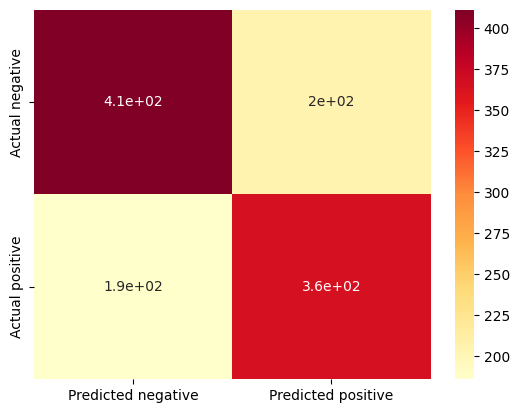

In [62]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

As good as best KNN model.

In [65]:
import joblib
joblib.dump(best_lgb_model, 'best_lgbm_model.pkl')

['best_lgbm_model.pkl']

## <a id='4.10'>Decision tree</a>

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
 # Creating the classifier object
clf_gini = DecisionTreeClassifier(
            criterion = "gini", 
            max_depth = 6) 
    # Performing training 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

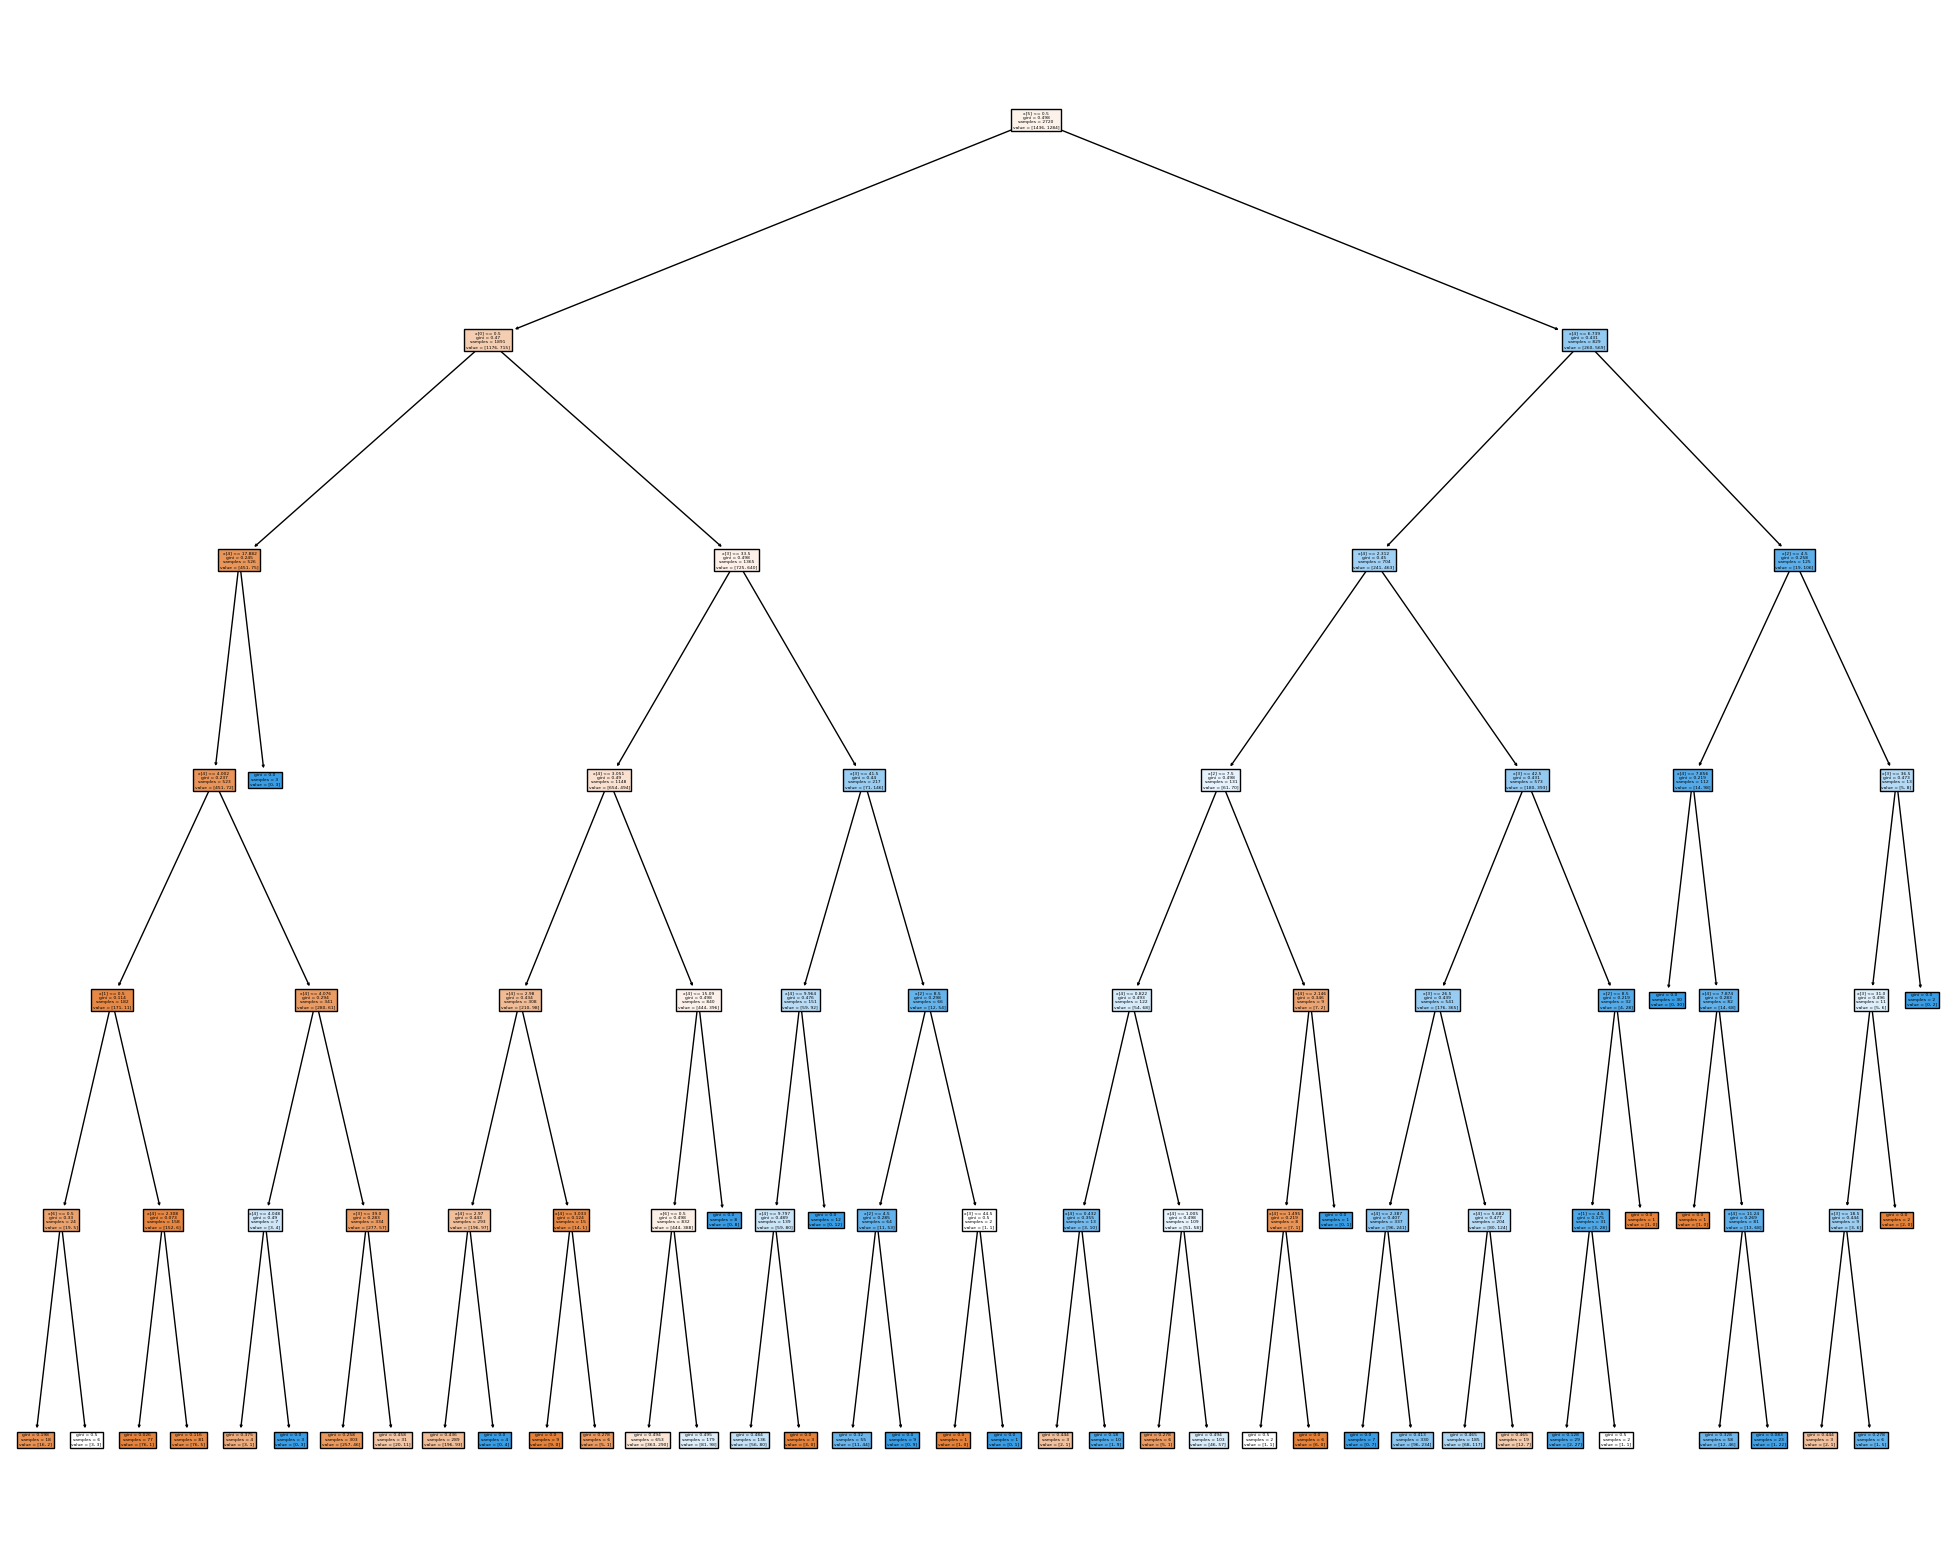

In [89]:
# import necessary library  
from sklearn.tree import plot_tree
  
fig = plt.figure(figsize=(25,20))
dectree_plot = plot_tree(clf_gini, filled=True)

In [90]:
y_pred_train = clf_gini.predict(X_train)
y_pred_test = clf_gini.predict(X_test)

Accuracy on train set: 0.69
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.70      0.74      0.72      1436
        True       0.69      0.64      0.66      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.68      0.70      0.69       616
        True       0.66      0.63      0.65       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

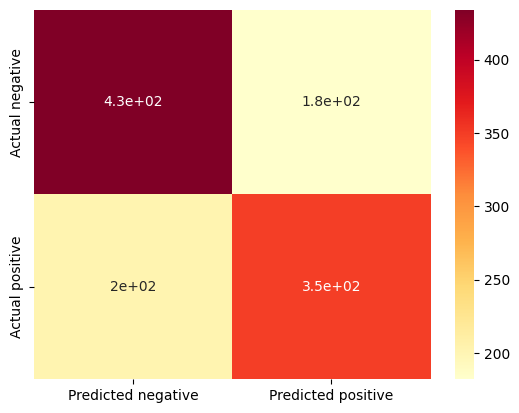

In [91]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Pretty good, similar to best results so far with KNN.

Hyperparameter optimisation with RandomizedSearchCV:

In [78]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
}

# Creating RandomizedSearchCV object
random_search = RandomizedSearchCV(
    clf_gini,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Use appropriate metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Performing RandomizedSearchCV training
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_dt_model = random_search.best_estimator_

# Fit the best model to the data
best_dt_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Parameters: {'splitter': 'random', 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'entropy'}


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=6,
                       random_state=42, splitter='random')

In [79]:
y_pred_train = best_dt_model.predict(X_train)
y_pred_test = best_dt_model.predict(X_test)

Accuracy on train set: 0.69
Accuracy on test set: 0.66
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.70      0.71      0.70      1436
        True       0.67      0.66      0.67      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.68      0.68      0.68       616
        True       0.64      0.65      0.65       551

    accuracy                           0.66      1167
   macro avg       0.66      0.66      0.66      1167
weighted avg       0.66      0.66      0.66      1167

--------------------------------------------------------------------

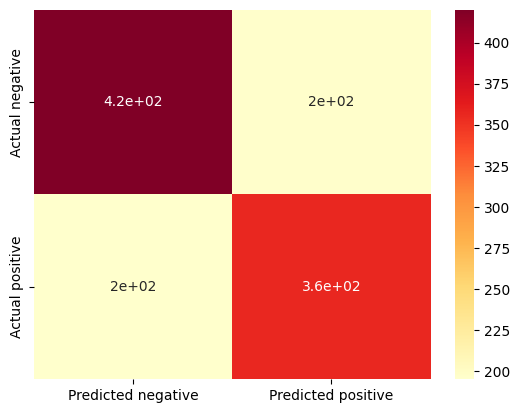

In [80]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

No improvement, GridSearchCV:

In [92]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# Creating GridSearchCV object
grid_search = GridSearchCV(
    clf_gini,
    param_grid=param_grid,
    scoring='accuracy',  # Use appropriate metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Performing GridSearchCV training
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Fit the best model to the data
best_dt_model.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6,
                       random_state=42, splitter='random')

In [93]:
y_pred_train = best_dt_model.predict(X_train)
y_pred_test = best_dt_model.predict(X_test)

Accuracy on train set: 0.69
Accuracy on test set: 0.69
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.69      0.76      0.72      1436
        True       0.69      0.62      0.65      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.75      0.72       616
        True       0.69      0.62      0.65       551

    accuracy                           0.69      1167
   macro avg       0.69      0.68      0.68      1167
weighted avg       0.69      0.69      0.69      1167

--------------------------------------------------------------------

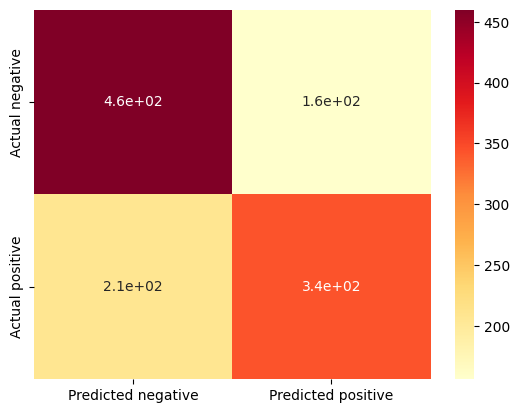

In [94]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Better negative recall, worse positive recall

## <a id='4.11'>Random forest</a>

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Creating the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

Accuracy on train set: 0.96
Accuracy on test set: 0.63
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1436
        True       0.96      0.95      0.96      1284

    accuracy                           0.96      2720
   macro avg       0.96      0.96      0.96      2720
weighted avg       0.96      0.96      0.96      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.66      0.61      0.63       616
        True       0.60      0.64      0.62       551

    accuracy                           0.63      1167
   macro avg       0.63      0.63      0.63      1167
weighted avg       0.63      0.63      0.63      1167

--------------------------------------------------------------------

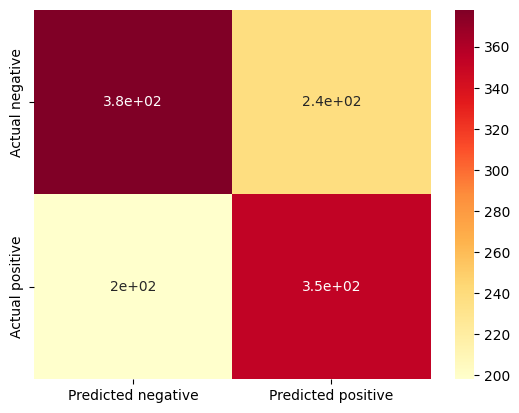

In [84]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Severe overfitting, hyperparameter optimisation with RandomizedSearchcv:

In [85]:
# Creating the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Creating RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Use appropriate metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42,
)

# Performing RandomizedSearchCV training
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Fit the best model to the data
best_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True}


RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=150, random_state=42)

In [220]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

Accuracy on train set: 0.68
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.67      0.79      0.73      1436
        True       0.71      0.56      0.62      1284

    accuracy                           0.68      2720
   macro avg       0.69      0.68      0.68      2720
weighted avg       0.69      0.68      0.68      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.67      0.77      0.72       616
        True       0.69      0.58      0.63       551

    accuracy                           0.68      1167
   macro avg       0.68      0.67      0.67      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

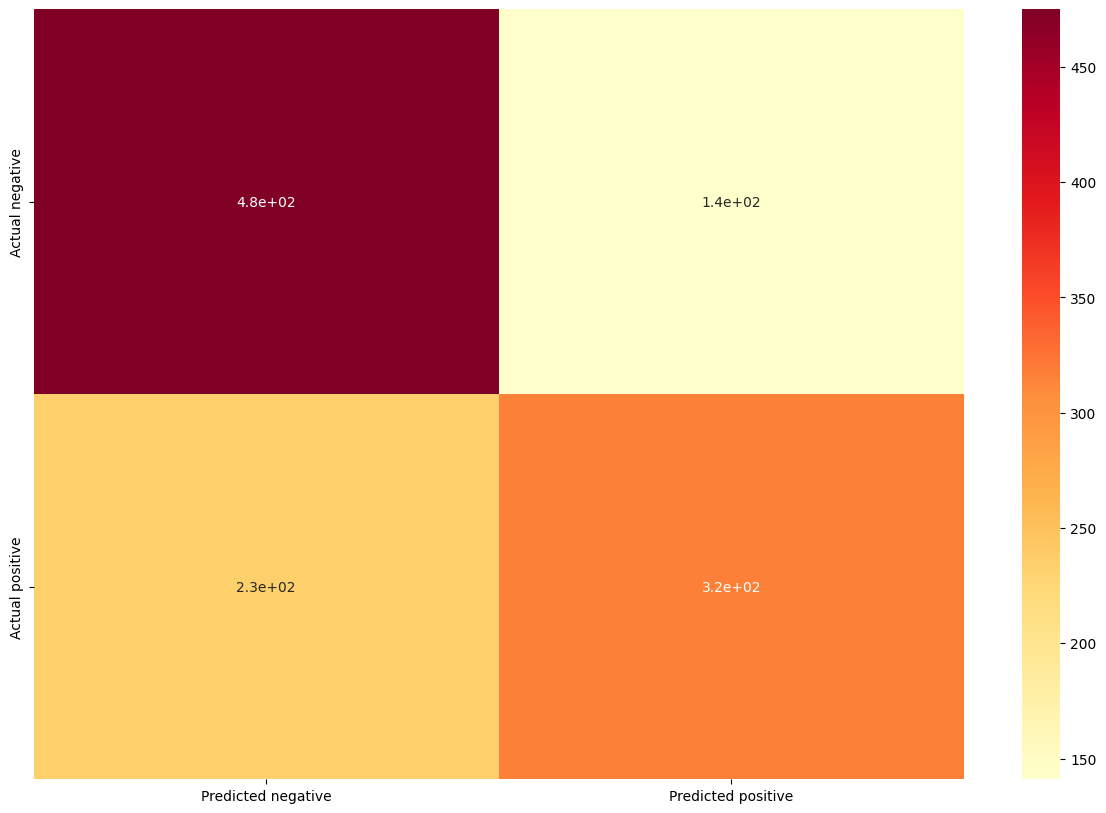

In [221]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Poor positive recall

## <a id='4.12'>Neural networks</a>

In [174]:
def evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test):
    # Convert probabilities to binary predictions using the threshold
    threshold=0.5
    y_pred_train_binary = (y_pred_train > threshold).astype(int)
    y_pred_test_binary = (y_pred_test > threshold).astype(int)

    # Print accuracy of our model for train and test set
    print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train_binary), 2))
    print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test_binary), 2))
    print("--------" * 10)

    # Print classification report of our model for train data
    print("Classification for train data:")
    print(classification_report(y_train, y_pred_train_binary))
    print("--------" * 10)

    # Print classification report of our model for test data
    print("Classification for test data:")
    print(classification_report(y_test, y_pred_test_binary))
    print("--------" * 10)

    # Evaluate the model with a confusion matrix
    cm = confusion_matrix(y_test, y_pred_test_binary)

    # Plot smaller heatmap
    heatmap_size=(8, 6)
    fig, ax = plt.subplots(figsize=heatmap_size)
    sns.heatmap(cm, annot=True, cmap='YlOrRd',
                yticklabels=['Actual negative', 'Actual positive'],
                xticklabels=['Predicted negative', 'Predicted positive'], ax=ax)
    plt.show()

In [125]:
import tensorflow as tf

In [150]:
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout   

In [126]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import layers
from tensorflow.keras import regularizers


import pathlib
import shutil
import tempfile

In [129]:
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_initializer = 'uniform', activation='relu', input_shape=(7,)),  # Input layer
    tf.keras.layers.Dense(64, kernel_initializer = 'uniform', activation='relu'),  # Hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, kernel_initializer = 'uniform', activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
    ])

    model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Precision(thresholds=0.5),
        tf.keras.metrics.Recall(thresholds=0.5)
    ])

In [185]:
# Define dictionary to store results
training_history = {}

# Define number of epochs and learning rate decay
N_TRAIN = len(X_train_)
EPOCHS = 200
BATCH_SIZE = 32
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.01,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False)


We will create a `tf.keras.callbacks.ModelCheckpoint` callback that saves weights only during training.

In [134]:
# Define path where checkpoints should be stored
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0) # Set verbose != 0 if you want output during training 

In [135]:
# Train the medium model with the new callback
with tf.device('/cpu:0'):
    training_history['medium'] = medium_model.fit(X_train_,
                        y_train,
                        validation_split=0.2,
                        verbose=0, 
                        steps_per_epoch=STEPS_PER_EPOCH,
                        epochs=EPOCHS,
                        callbacks=[cp_callback])  # Pass callback to training

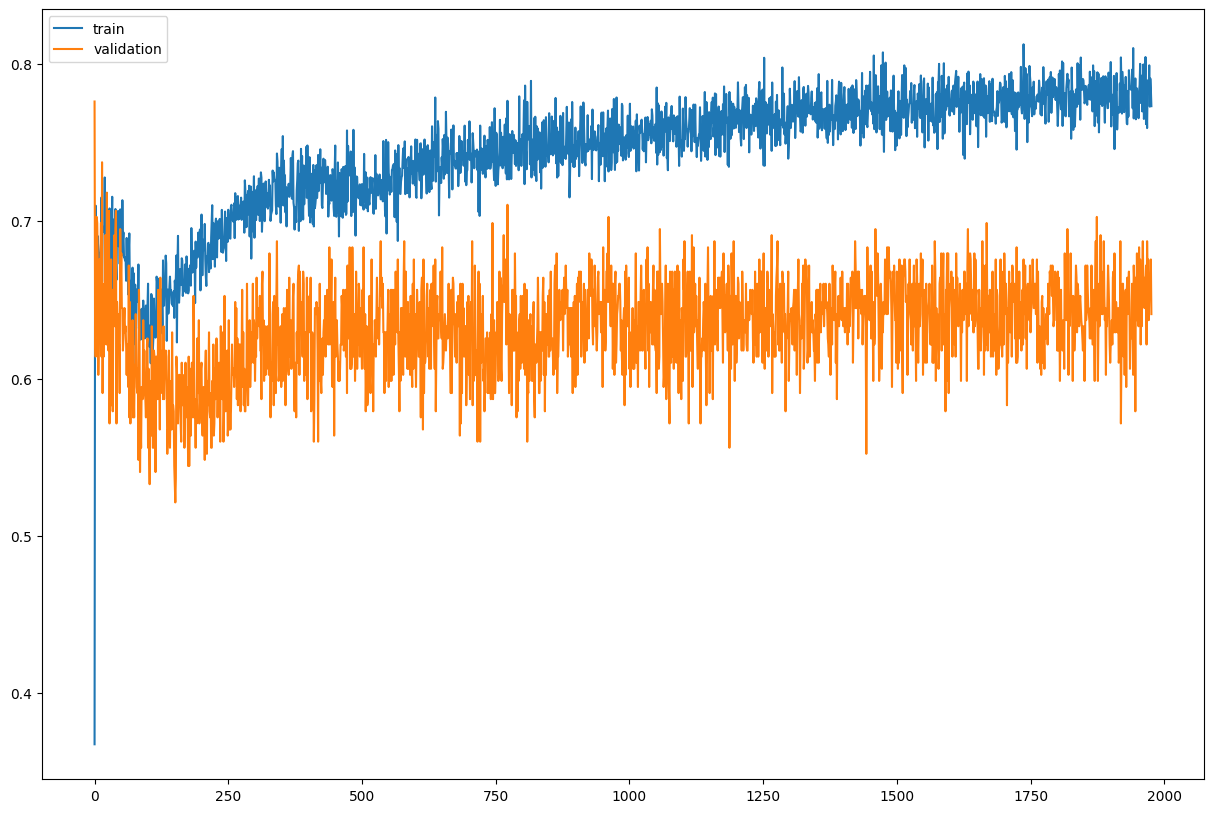

In [146]:
plt.plot(training_history['medium'].history['recall'])
plt.plot(training_history['medium'].history['val_recall'])
plt.legend(['train', 'validation'], loc='upper left')

In [175]:
y_pred_train = medium_model.predict(X_train_)
y_pred_test = medium_model.predict(X_test_)

85/85 [==============================] - 0s 2ms/step


37/37 [==============================] - 0s 2ms/step


Accuracy on train set: 0.8
Accuracy on test set: 0.62
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.80      0.82      0.81      1436
        True       0.79      0.78      0.78      1284

    accuracy                           0.80      2720
   macro avg       0.80      0.80      0.80      2720
weighted avg       0.80      0.80      0.80      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.65      0.61      0.63       616
        True       0.59      0.64      0.61       551

    accuracy                           0.62      1167
   macro avg       0.62      0.62      0.62      1167
weighted avg       0.62      0.62      0.62      1167

---------------------------------------------------------------------

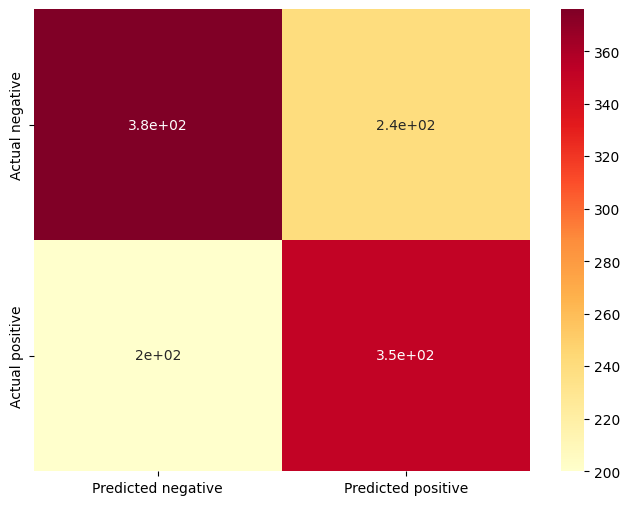

In [176]:
evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test)

Overfitting, less complex neural network:

In [201]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
        
    ]
)


In [202]:
training = model.fit(
    X_train_,
    y_train,
    batch_size=128,
    epochs=400,
    validation_split=0.2, 
    verbose=1,
)

Epoch 1/400


17/17 [==============================] - 2s 28ms/step - loss: 0.6925 - precision_8: 0.5276 - recall_8: 0.1863 - val_loss: 0.6680 - val_precision_8: 0.6327 - val_recall_8: 0.3591
Epoch 2/400
17/17 [==============================] - 0s 9ms/step - loss: 0.6538 - precision_8: 0.6183 - recall_8: 0.4488 - val_loss: 0.6447 - val_precision_8: 0.6164 - val_recall_8: 0.5212
Epoch 3/400
17/17 [==============================] - 0s 9ms/step - loss: 0.6323 - precision_8: 0.6444 - recall_8: 0.5639 - val_loss: 0.6278 - val_precision_8: 0.6393 - val_recall_8: 0.6023
Epoch 4/400
17/17 [==============================] - 0s 7ms/step - loss: 0.6201 - precision_8: 0.6218 - recall_8: 0.5854 - val_loss: 0.6175 - val_precision_8: 0.6398 - val_recall_8: 0.5830
Epoch 5/400
17/17 [==============================] - 0s 8ms/step - loss: 0.6118 - precision_8: 0.6485 - recall_8: 0.6283 - val_loss: 0.6095 - val_precision_8: 0.6423 - val_recall_8: 0.6100
Epoch 6/400
17/17 [==============================] - 0s 9ms/step -

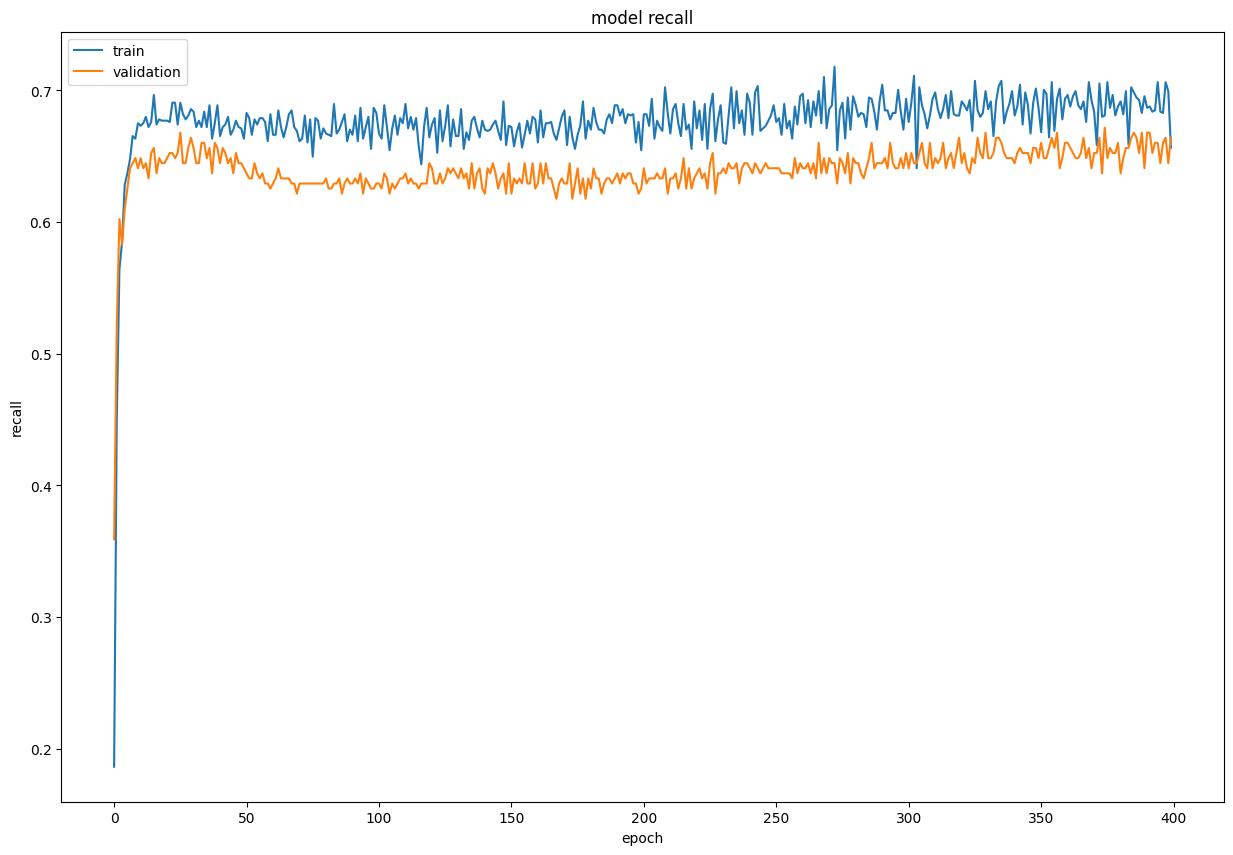

In [203]:
# summarize history for recall
plt.plot(training.history['recall_8'])
plt.plot(training.history['val_recall_8'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [204]:
y_pred_train = model.predict(X_train_)
y_pred_test = model.predict(X_test_)

85/85 [==============================] - 0s 3ms/step


37/37 [==============================] - 0s 3ms/step


Accuracy on train set: 0.72
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.73      0.74      0.73      1436
        True       0.70      0.70      0.70      1284

    accuracy                           0.72      2720
   macro avg       0.72      0.72      0.72      2720
weighted avg       0.72      0.72      0.72      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.69      0.68      0.69       616
        True       0.65      0.66      0.65       551

    accuracy                           0.67      1167
   macro avg       0.67      0.67      0.67      1167
weighted avg       0.67      0.67      0.67      1167

--------------------------------------------------------------------

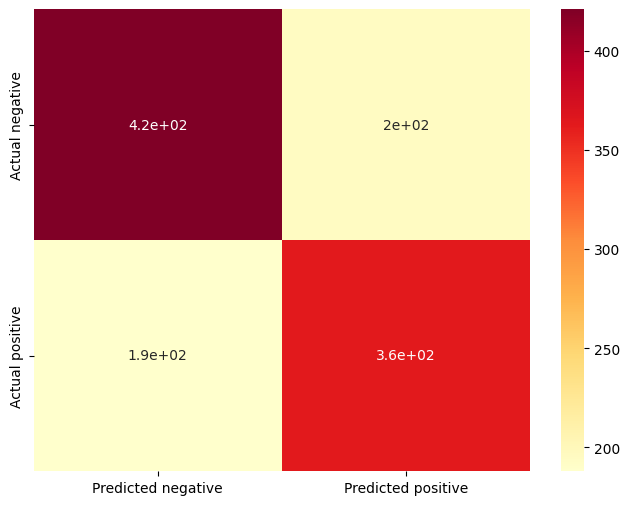

In [205]:
evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test)

As good as best KNN model

Neural network with more dropout layers:

In [188]:

dropout_model = tf.keras.Sequential([
      tf.keras.layers.Dense(128,kernel_initializer = 'uniform', activation='relu', input_shape=(7,)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128,kernel_initializer = 'uniform', activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
    ])


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
dropout_model.compile(
    optimizer=opt,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
        
    ]
)

In [206]:
training = dropout_model.fit(
    X_train_,
    y_train,
    batch_size=128,
    epochs=400,
    validation_split=0.2, 
    verbose=1,
)

Epoch 1/400
13/17 [=====================>........] - ETA: 0s - loss: 0.5988 - precision_5: 0.6667 - recall_5: 0.5769

17/17 [==============================] - 0s 21ms/step - loss: 0.5916 - precision_5: 0.6728 - recall_5: 0.5717 - val_loss: 0.5951 - val_precision_5: 0.6667 - val_recall_5: 0.6332
Epoch 2/400
17/17 [==============================] - 0s 20ms/step - loss: 0.6018 - precision_5: 0.6788 - recall_5: 0.6000 - val_loss: 0.6239 - val_precision_5: 0.7658 - val_recall_5: 0.3282
Epoch 3/400
17/17 [==============================] - 0s 18ms/step - loss: 0.6107 - precision_5: 0.7086 - recall_5: 0.4176 - val_loss: 0.5974 - val_precision_5: 0.6878 - val_recall_5: 0.6293
Epoch 4/400
17/17 [==============================] - 0s 18ms/step - loss: 0.6073 - precision_5: 0.6488 - recall_5: 0.6020 - val_loss: 0.5962 - val_precision_5: 0.6833 - val_recall_5: 0.6332
Epoch 5/400
17/17 [==============================] - 0s 17ms/step - loss: 0.5961 - precision_5: 0.6667 - recall_5: 0.5639 - val_loss: 0.6033 - val_precision_5: 0.7045 - val_recall_5: 0.5985
Epoch 6/400
17/17 [==============================] - 0s 17ms/s

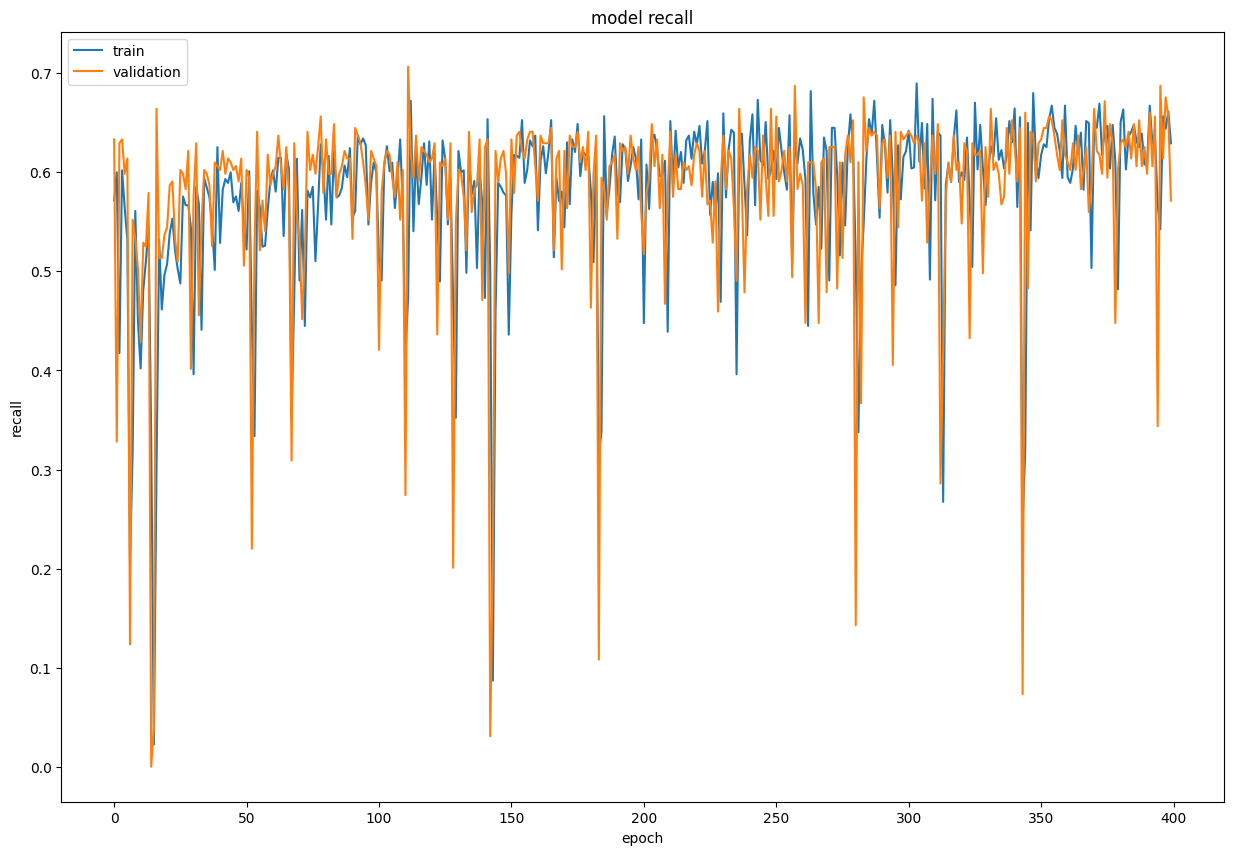

In [207]:
# summarize history for recall
plt.plot(training.history['recall_5'])
plt.plot(training.history['val_recall_5'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [208]:
y_pred_train = dropout_model.predict(X_train_)
y_pred_test = dropout_model.predict(X_test_)

 1/37 [..............................] - ETA: 1s

37/37 [==============================] - 0s 3ms/step


Accuracy on train set: 0.69
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.68      0.77      0.72      1436
        True       0.70      0.60      0.65      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.68      0.76      0.72       616
        True       0.69      0.59      0.64       551

    accuracy                           0.68      1167
   macro avg       0.68      0.68      0.68      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

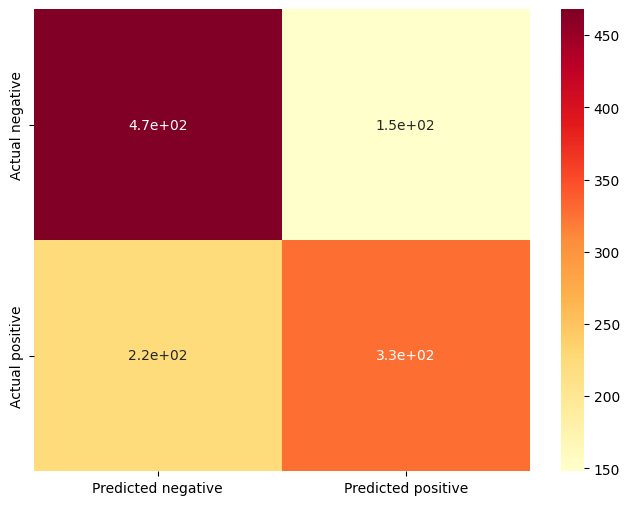

In [209]:
evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test)

Previous neural network was better, true recall is not good

## <a id='4.13'>Conclusion</a>

The best model was the KNN model after optuna hyperparameter optimisation for accuracy:

In [230]:

best_model = joblib.load('optuna_acc_model_knn.pkl')

In [231]:
best_model

KNeighborsClassifier(algorithm='brute', leaf_size=93, n_neighbors=42, p=10)

In [232]:
y_pred_train = best_model.predict(X_train_)
y_pred_test = best_model.predict(X_test_)

Accuracy on train set: 0.69
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

       False       0.71      0.72      0.71      1436
        True       0.68      0.66      0.67      1284

    accuracy                           0.69      2720
   macro avg       0.69      0.69      0.69      2720
weighted avg       0.69      0.69      0.69      2720

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

       False       0.70      0.71      0.70       616
        True       0.67      0.66      0.66       551

    accuracy                           0.68      1167
   macro avg       0.68      0.68      0.68      1167
weighted avg       0.68      0.68      0.68      1167

--------------------------------------------------------------------

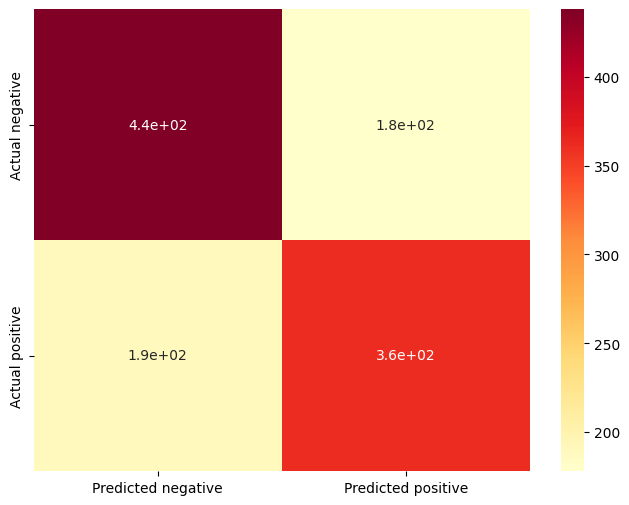

In [233]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

In [234]:
# For the training set
y_pred_train_prob = best_model.predict_proba(X_train_)[:, 1] 

# For the testing set
y_pred_test_prob = best_model.predict_proba(X_test_)[:, 1]  

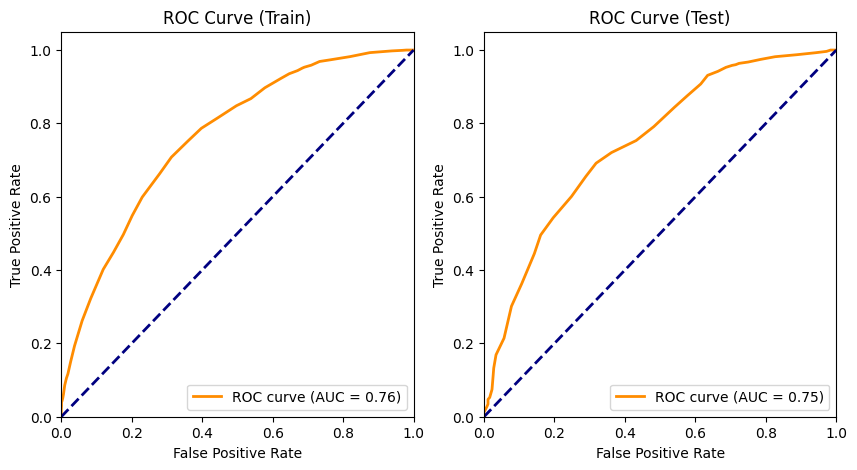

In [235]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob)